In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
%matplotlib inline
import matplotlib.pyplot as plt
import joblib, json, sys, os
from IPython.display import Image, display_png
import json, glob, os.path
import tifffile
import pandas as pd
import sys, os, os.path, re, csv, math
import linecache
from statistics import mean,stdev
import seaborn as sns
import pprint
from statannotations.Annotator import Annotator

In [3]:
# Note: We are currently using our local directory names (e.g., /export3/Imaging/...) for data paths.
# Please refer to the same name files uploaded on GitHub as needed.

In [5]:
# Read atlas information.Refer to Matsumoto Mitani Horiguchi et al 2019 Nature Protocols. (This file was uproaded in github.)
data_Atlas = pd.read_csv(filepath_or_buffer="/export3/Imaging/atlas_for_fig/count_all_rgb.csv", encoding="ms932", sep=",")
data_atlas=np.array(data_Atlas.values.tolist())
data_GO = pd.read_csv(filepath_or_buffer="/export3/Imaging/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")
data_GO

id  graph_order    R    G    B
0      997            0  255  255  255
1       68            7   38  143   69
2      667            8   38  143   69
3    52192            9   38  143   69
4    52196           10   38  143   69
..     ...          ...  ...  ...  ...
666    129         1299  170  170  170
667    140         1300  170  170  170
668    145         1301  170  170  170
669    153         1302  170  170  170
670    164         1303  170  170  170

[671 rows x 5 columns]

Atlas cell number:  100120098


/home/mitani/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


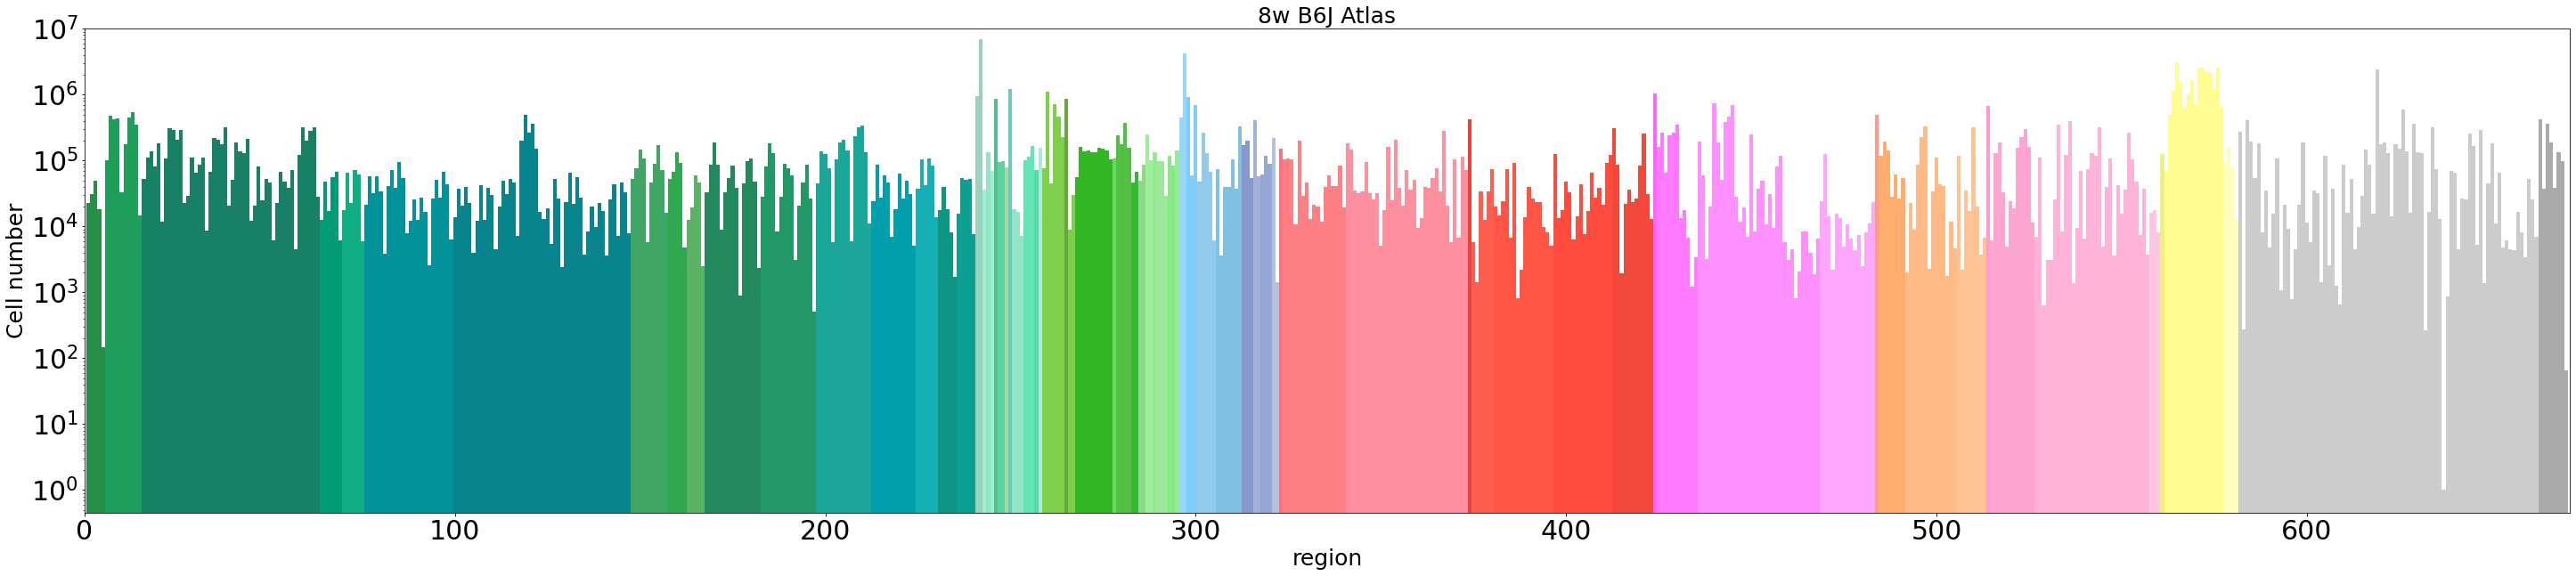

In [13]:
# CUBIC-Atlas cells information (refer to Matsumoto Mitani Horiguchi et al 2019 Nature Protocols)
Dir =  "/export3/Imaging/atlas_for_fig/"
          
colorlist=[]
x=[]
y=[]#atlas
n=[]
j=[]
total = 0
for i in range (671):
    atlas_id_num = data_GO["id"].values[i]
    colorlist.append((data_GO["R"].values[i]/255,data_GO["G"].values[i]/255,data_GO["B"].values[i]/255))
    x.append(i)
    sub = 0
    for p in range(671):
        if data_Atlas["id"][p] == atlas_id_num :
            sub = data_Atlas["count"][p]
            total = total + sub
    y.append(sub)
    j.append([atlas_id_num, sub])
#np.savetxt(Dir + "TEST_regional_Nuclear_table.csv", j , delimiter=',', fmt='%d')

print ("Atlas cell number: " , total)
fig=plt.subplots(figsize=(50,10))
plt.title("8w B6J Atlas", fontsize=25)
plt.xlabel("region", fontsize=25)
plt.ylabel("Cell number", fontsize=25)
plt.tick_params(labelsize=30)
plt.bar(x,y, width =1 , color=colorlist, log =True , align="center")
plt.xlim(xmin=0, xmax=671) 
plt.ylim(ymin=0, ymax=10000000) 
plt.savefig( Dir + "Atlas_"+ total.astype(str) +".png",format = 'png', dpi=100)

In [35]:
# Read Allen brain atlas CCFv3 region information.(This file was uproaded in github.)
dir= "/export3/Imaging/CUBIC-Atlas-R-test/"
dir_ana=dir+"Allen_graph.json"

with open(dir_ana) as f:
    param_ana = json.load(f)
    
id=[]
path_id=[]

for el in param_ana:
    original = el['id']
    id.append(original)
    newid = el['structure_id_path']
    path_id.append(newid)

import ast
labels = []
ids = []
colorlist=[]
volumelist_53=[]

labels = ["fiber tracts","VS" ]
ids =    [1009,73]
colorlist=[(204/255, 204/255, 204/255),(170/255, 170/255, 170/255)]

cou=0
oya_id=[]

for i in ids:
    oya_id.append([])

for el in param_ana:
    temp_id = el['id']
    temp_path_id = el['structure_id_path']
    temp_oya_id = 997
    for ids_i in ids:     
        if temp_path_id.count(ids_i) > 0:
            temp_oya_id= ids_i 
    if temp_oya_id != 997 and temp_id in data_GO["id"].tolist():
        #print(temp_id)
        oya_id[ids.index(temp_oya_id)].append(temp_id)
        cou = cou +1

In [1429]:
# VT, FT removed data were saved and used as source data for this analysis.

#data_1.to_csv("/export3/Imaging/Axial/Sahara_project/Supplemetary Table/" + "ID_356_tau_point_data_without_FT_VS.csv", index=False, header=True, chunksize=50000,
#            columns=["X","Y","Z","Allen_ID","deltaI","vol"])
#data_2.to_csv("/export3/Imaging/Axial/Sahara_project/Supplemetary Table/" + "ID_357_tau_point_data_without_FT_VS.csv", index=False, header=True, chunksize=50000,
#            columns=["X","Y","Z","Allen_ID","deltaI","vol"])
#data_3.to_csv("/export3/Imaging/Axial/Sahara_project/Supplemetary Table/" + "ID_351_tau_point_data_without_FT_VS.csv", index=False, header=True, chunksize=50000,
#            columns=["X","Y","Z","Allen_ID","deltaI","vol"])


# Please read csvs in your jupyter notebook: 
# ID_356_tau_point_data_without_FT_VS.csv as data_1
# ID_357_tau_point_data_without_FT_VS.csv as data_2
# ID_351_tau_point_data_without_FT_VS.csv as data_3

In [38]:
# Read Allen brain atlas CUBIC atlas 1.1 (Mano T et al 2021) region information.(This file was uproaded in github.)
dir= "/export3/Imaging/cubic-atlas_v1-1/cubic-atlas/"
dir_ana=dir+"summary_CUBIC-Atlas-1-1.csv"

data_id = pd.read_csv(filepath_or_buffer=dir_ana, encoding="ms932", sep=",")

In [39]:
data_id 

id acronym                           node_name  graph_order  \
0    997    root                                root            0   
1      8    grey       Basic cell groups and regions            1   
2    567      CH                            Cerebrum            2   
3    688     CTX                     Cerebral cortex            3   
4    695   CTXpl                      Cortical plate            4   
..   ...     ...                                 ...          ...   
834  129      V3                     third ventricle         1299   
835  140      AQ                   cerebral aqueduct         1300   
836  145      V4                    fourth ventricle         1301   
837  153     V4r                      lateral recess         1302   
838  164       c  central canal, spinal cord/medulla         1303   

         rgb_triplet  cell_count  volume(mm3)  density(cells/mm3)  
0    [255, 255, 255]    78620375    506.05289        155359.99590  
1    [191, 218, 227]    70525778    449.60086        156863.08540  
2    [176, 240, 255]    39291452    275.87673        142423.94190  
3    [176, 255, 184]    31750427    221.54964        143310.66800  
4    [112, 255, 112]    30687805    212.64380        144315.54300  
..               ...         ...          ...                 ...  
834  [170, 170, 170]      144614      0.90005        160673.85380  
835  [170, 170, 170]       26972      0.40620         66400.27696  
836  [170, 170, 170]      118275      0.96495        122570.72070  
837  [170, 170, 170]       71934      0.46333        155254.98260  
838  [170, 170, 170]          68      0.00048        140387.09680  

[839 rows x 8 columns]

In [40]:
regionname_list=[]

for i in data_GO["id"]:
    regionname_list.append(data_id["acronym"][data_id["id"]==i].values) 
regionname_list = np.array(regionname_list)
    
volume_list=[]

for i in data_GO["id"]:
    volume_list.append(data_id["volume(mm3)"][data_id["id"]==i].values)
volume_list = np.array(volume_list)

In [41]:
# Aggregate tau by region.(intensity)
tau_max_intensity_list = []

for i in data_GO["id"]:
    tau_max_intensity_list.append(np.sum(data_2["deltaI"][data_2["Allen_ID"] == i])/volume_list[data_GO["id"] == i][0][0])
tau_max_intensity_list = np.array(tau_max_intensity_list)

In [42]:
# Aggregate tau by region.(volume)
tau_volume_list = []

for i in data_GO["id"]:
    tau_volume_list.append(np.sum(data_2["vol"][data_2["Allen_ID"] == i])/volume_list[data_GO["id"] == i][0][0])#/volume_list[data_GO["id"] == i][0][0]
    #tau_volume_list.append(np.sum(data_2["deltaI"][data_2["Allen_ID"] == i]/data_2["vol"][data_2["Allen_ID"] == i]))
tau_volume_list = np.array(tau_volume_list)

In [11]:
# Predifinced middle-scale region information. his file was uproaded in github.)
dir= "/export3/Imaging/Axial/"
dir_ana=dir+"summary_CUBIC-Atlas-1-1-53region-only-extracted.csv"

data_53regions = pd.read_csv(filepath_or_buffer=dir_ana, encoding="ms932", sep=",")

In [12]:
# Determine the corresponding smallest regions for the middle regions.
# This is because the regions referred to in the pTau CSV data are derived from 671 smallest regions.

import ast
labels = []
ids = []
colorlist=[]
volumelist_53=[]

labels = np.array(data_53regions["acronym"]).tolist()
ids =    np.array(data_53regions["id"]).tolist()
colorlist= [np.array(ast.literal_eval(s))/255 for s in data_53regions["rgb_triplet"]]
volumelist_53=np.array(data_53regions["volume(mm3)"]).tolist()

cou=0
oya_id=[]

for i in ids:
    oya_id.append([])

for el in param_ana:
    temp_id = el['id']
    temp_path_id = el['structure_id_path']
    temp_oya_id = 997
    for ids_i in ids:     
        if temp_path_id.count(ids_i) > 0:
            temp_oya_id= ids_i 
    if temp_oya_id != 997 and temp_id in data_GO["id"].tolist():
        print(temp_id)
        oya_id[ids.index(temp_oya_id)].append(temp_id)
        cou = cou +1671 

68
667
52192
52196
52264
320
943
648
844
882
656
962
767
1021
1085
558
838
654
702
889
929
981
201
1047
1070
1038
1062
1030
113
1094
1128
478
510
878
657
950
974
1102
2
450
854
577
625
945
1026
1006
670
1086
1111
9
461
18693
18697
18701
18705
18709
18713
873
806
1035
1090
862
893
36
180
148
187
638
662
897
1106
1010
1058
857
849
527
600
678
252
156
243
735
251
816
847
954
1005
696
643
759
791
249
456
959
755
990
1023
520
598
1074
905
1114
233
601
649
281
1066
401
433
1046
441
421
973
573
613
74
121
593
821
721
778
33
305
750
269
869
902
377
393
805
41
501
565
257
469
31578
31582
31586
31590
31594
31598
31632
31636
31640
31644
31648
31652
935
211
1015
919
927
588
296
772
810
819
171
304
363
84
132
707
556
827
1054
1081
448
412
630
440
488
484
582
620
910
52977
969
288
1125
608
680
996
328
1101
783
831
120
163
344
314
355
704
694
800
675
699
671
965
774
906
279
442
434
610
274
330
542
430
687
590
622
31550
31554
31558
31562
31566
31570
31604
31608
31612
31616
31620
31624
97
1127
234
289


Nuclear cell number:  70112930.66666676


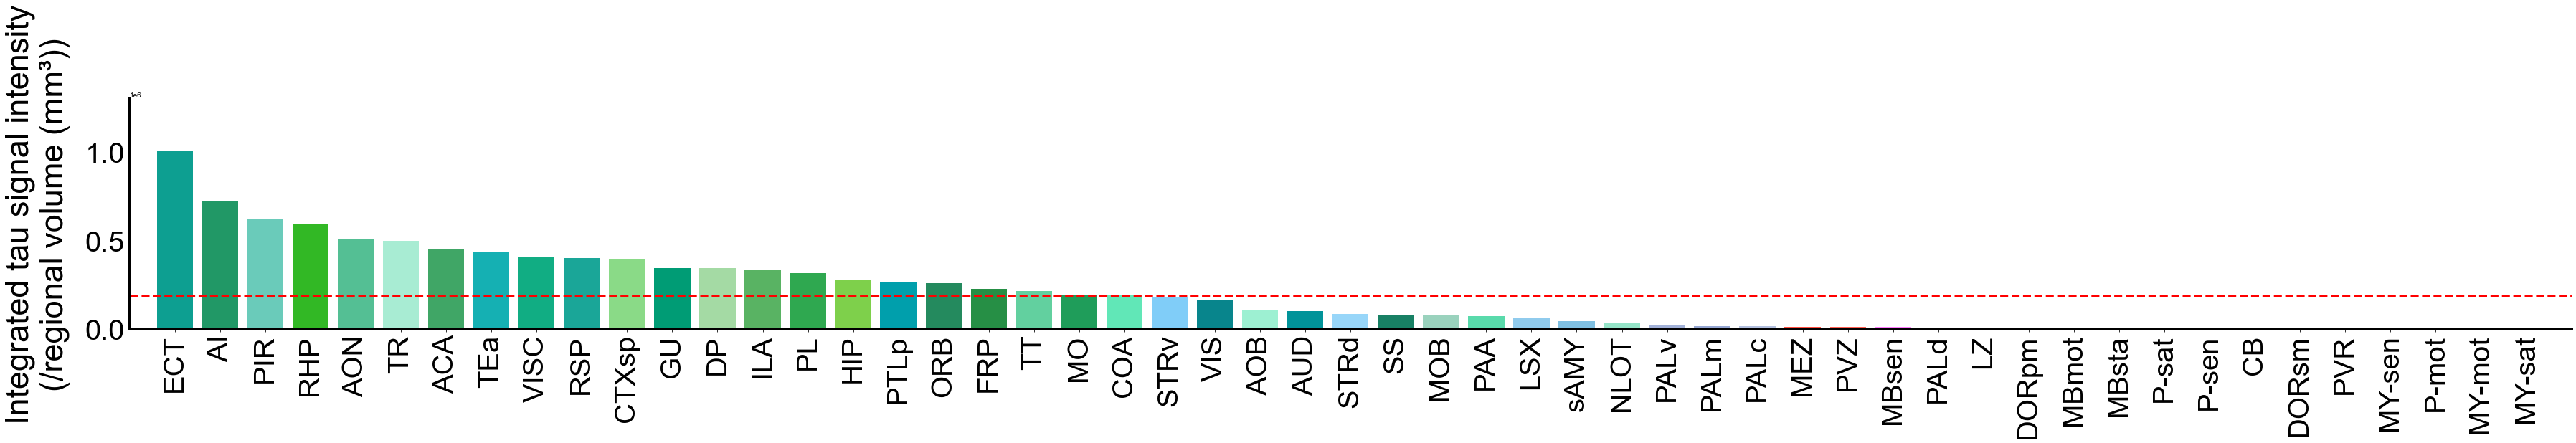

In [51]:
# Visualize pTau Data at Mid-Scale Regions (Fig.2B)
# Regions above the mean red line have been analyzed for subsequent tau analyses.

import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

Dir =  "/export3/Imaging/atlas_for_fig/"

x = list(range(len(ids)))
y = [0] * len(ids)  # atlas
total = 0

for i in range(len(ids)):
    for m in oya_id[i]:
        for p in range(671):
            if data_Atlas["id"][p] == m:
                tau_max_intensity_list_1 = np.sum(data_1["deltaI"][data_1["Allen_ID"] == m])
                tau_max_intensity_list_2 = np.sum(data_2["deltaI"][data_2["Allen_ID"] == m])
                tau_max_intensity_list_3 = np.sum(data_3["deltaI"][data_3["Allen_ID"] == m])
                y[i] += np.mean([tau_max_intensity_list_1, tau_max_intensity_list_2, tau_max_intensity_list_3])
                total += np.mean([tau_max_intensity_list_1, tau_max_intensity_list_2, tau_max_intensity_list_3])
    y[i] = y[i]/volumelist_53[i]

print("Nuclear cell number: ", total)

# Create a list of tuples where each tuple is (y, label, color)
data = list(zip(y, labels, colorlist))

# Sort the data by y value (which is at index 0 in the tuple)
data.sort(key=lambda tup: tup[0], reverse=True)

# Unzip the sorted data
y_sorted, labels_sorted, colorlist_sorted = zip(*data)

fig, ax = plt.subplots(figsize=(50, 7))
ax.set_ylabel("Integrated tau signal intensity\n(/regional volume (mm³))", fontsize=45, labelpad=20)
plt.tick_params(labelsize=40)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the color of the left and bottom spines to black
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(4)

# Create the bar chart
ax.bar(x, y_sorted, color=colorlist_sorted, log=False, align="center")

# Replace x-axis numbers with labels
ax.set_xticks(x)
ax.set_xticklabels(labels_sorted, rotation='vertical')

plt.xlim(xmin=-1.0, xmax=len(ids)) 
plt.ylim(ymin=0, ymax=1300000)  # Adjust ymax to be slightly larger than the maximum y value for better visualization

# Draw a horizontal line at the mean of y
mean_y = np.mean(y_sorted)
plt.axhline(mean_y, color='red', linewidth=3, linestyle='dashed')

plt.tight_layout()



plt.savefig(dir2 + "53_region_bar_graph_revised.jpeg", transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)



plt.show()

# Close the figure
plt.close()


Nuclear cell number:  3894291563.9999976


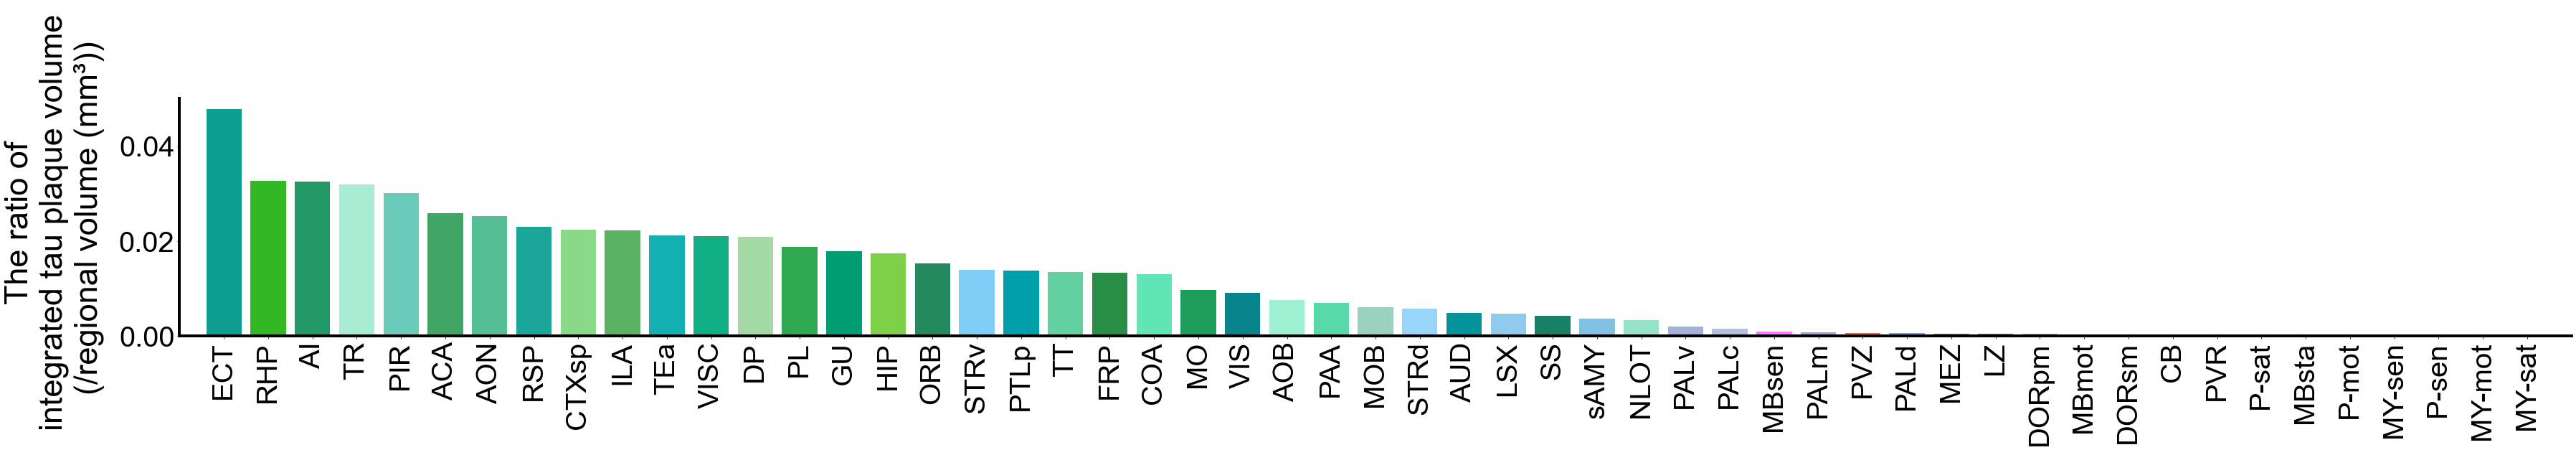

In [55]:
# Visualized tau data at middle-scale regions.
# volume 

import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

Dir =  "/export3/Imaging/atlas_for_fig/"

x = list(range(len(ids)))
y = [0] * len(ids)  # atlas
total = 0

for i in range(len(ids)):
    for m in oya_id[i]:
        for p in range(671):
            if data_Atlas["id"][p] == m:
                tau_max_intensity_list_1 = np.sum(data_1["vol"][data_1["Allen_ID"] == m])
                tau_max_intensity_list_2 = np.sum(data_2["vol"][data_2["Allen_ID"] == m])
                tau_max_intensity_list_3 = np.sum(data_3["vol"][data_3["Allen_ID"] == m])
                y[i] += np.mean([tau_max_intensity_list_1, tau_max_intensity_list_2, tau_max_intensity_list_3])
                total += np.mean([tau_max_intensity_list_1, tau_max_intensity_list_2, tau_max_intensity_list_3])
    y[i] = y[i]/(volumelist_53[i]*1000*1000*1000) # um3にあわせる

print("Nuclear cell number: ", total)

# Create a list of tuples where each tuple is (y, label, color)
data = list(zip(y, labels, colorlist))

# Sort the data by y value (which is at index 0 in the tuple)
data.sort(key=lambda tup: tup[0], reverse=True)

# Unzip the sorted data
y_sorted, labels_sorted, colorlist_sorted = zip(*data)

fig, ax = plt.subplots(figsize=(50, 7))
ax.set_ylabel("The ratio of \nintegrated tau plaque volume \n(/regional volume (mm³))", fontsize=45, labelpad=20)
plt.tick_params(labelsize=40)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the color of the left and bottom spines to black
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(4)

# Create the bar chart
ax.bar(x, y_sorted, color=colorlist_sorted, log=False, align="center")

# Replace x-axis numbers with labels
ax.set_xticks(x)
ax.set_xticklabels(labels_sorted, rotation='vertical')

plt.xlim(xmin=-1.0, xmax=len(ids)) 
plt.ylim(ymin=0.0, ymax=0.05)  # Adjust ymax to be slightly larger than the maximum y value for better visualization

# Draw a horizontal line at the mean of y
mean_y = np.mean(y_sorted)
#plt.axhline(mean_y, color='red', linewidth=3, linestyle='dashed')

plt.tight_layout()



plt.savefig(dir2 + "53_region_bar_graph_volume_ver_revised.jpeg", transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)



plt.show()

# Close the figure
plt.close()


In [1230]:
# Aggregate tau by region above the mean red line.
regionname_list=[]

for i in data_GO["id"]:
    regionname_list.append(data_id["acronym"][data_id["id"]==i].values) 
regionname_list = np.array(regionname_list)
    
volume_list=[]

for i in data_GO["id"]:
    volume_list.append(data_id["volume(mm3)"][data_id["id"]==i].values)
volume_list = np.array(volume_list)

tau_max_intensity_list = []

for i in data_GO["id"]:
    tau_max_intensity_list.append(np.sum(data_2["deltaI"][data_2["Allen_ID"] == i])/volume_list[data_GO["id"] == i][0][0])
tau_max_intensity_list = np.array(tau_max_intensity_list)

top_large_regions_indices = np.where(y > np.mean(y))[0]

# Get the ids of all small regions in the top 5 large regions
small_region_ids = []
for index in top_large_regions_indices:
    small_region_ids.extend(oya_id[index])
small_region_ids = np.array(small_region_ids)

In [1232]:
# Aggregate tau by region above the mean red line.
tau_region1 = []
tau_region2  = []
tau_region3  = []
tau_region_mean = []
regionname_list2 = []
volume_list2 = []

selected_region_num = len(small_region_ids)

for i in unique_ids_in_slice.astype(int):
    #print(i)
    regionname_list2.append(data_id["acronym"][data_id["id"]==i].values) 
regionname_list2 = np.array(regionname_list2)

for i in unique_ids_in_slice.astype(int):
    volume_list2.append(data_id["volume(mm3)"][data_id["id"]==i].values)
volume_list2 = np.array(volume_list2)

cou = 0
for i in unique_ids_in_slice.astype(int):
    #print(i)
    tau_region1.append(np.sum(data_1["deltaI"][data_1["Allen_ID"] == i])/volume_list2[cou])
    tau_region2.append(np.sum(data_2["deltaI"][data_2["Allen_ID"] == i])/volume_list2[cou])
    tau_region3.append(np.sum(data_3["deltaI"][data_3["Allen_ID"] == i])/volume_list2[cou])
    tau_region_mean.append((tau_region1[cou][0] + tau_region2[cou][0]+ tau_region3[cou][0])/3)
    cou += 1
tau_region1= np.array(tau_region1)
tau_region2= np.array(tau_region2)
tau_region3= np.array(tau_region3)
tau_region_mean = np.array(tau_region_mean)

tau_region1_rank = np.argsort(np.argsort(tau_region1.flatten()))
tau_region2_rank = np.argsort(np.argsort(tau_region2.flatten()))
tau_region3_rank = np.argsort(np.argsort(tau_region3.flatten()))
tau_region_mean_rank = np.argsort(np.argsort(tau_region_mean.flatten()))

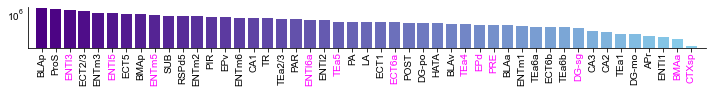

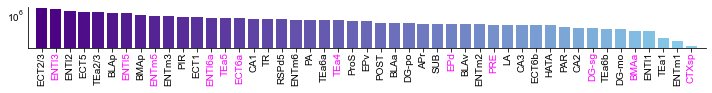

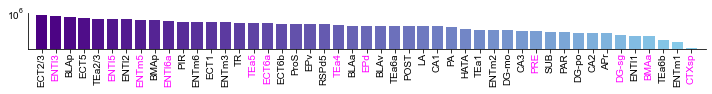

In [1355]:
# Visualize. (Fig.2D)
import matplotlib
import numpy as np
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

# create color map
colors = ["skyblue", "indigo"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors, N=256)

#highlight_regions = ['CTXsp', 'ENTl1', 'CA2', 'CA3', 'BLAa', 'TEa4', 'ECT6a', 'TEa5', 'PIR', 'BMAp', 'ENTl5', 'ENTl3']
highlight_regions =['CTXsp',
 'BMAa',
 'DG-sg',
 'PRE',
 'EPd',
 'TEa4',
 'ECT6a',
 'TEa5',
 'ENTl6a',
 'ENTm5',
 'ENTl5',
 'ENTl3']


# Create bar plots for each sample
for i, tau_region in enumerate([tau_region1, tau_region2, tau_region3], start=1):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 1.4))  # adjust the height here

    # Sort regions by tau values in descending order
    sorted_indices = np.argsort(tau_region.flatten())[::-1]  # reverse the array for descending order
    sorted_region_names = np.squeeze(regionname_list2)[sorted_indices]  # apply np.squeeze() to convert elements to strings
    sorted_tau_region = np.squeeze(tau_region)[sorted_indices]  # apply np.squeeze() to convert to 1D array

    # Map ranks to colors
    if i == 1:
        sorted_colors = cmap(tau_region1_rank[sorted_indices] / tau_region1_rank.max())
    elif i == 2:
        sorted_colors = cmap(tau_region2_rank[sorted_indices] / tau_region2_rank.max())
    elif i == 3:
        sorted_colors = cmap(tau_region3_rank[sorted_indices] / tau_region3_rank.max())

    # Create a bar plot
    ax.bar(sorted_region_names, sorted_tau_region, color=sorted_colors, align="center")

    # Set y-axis to logarithmic scale
    ax.set_yscale('log')

    # Adjust the padding between the bars
    ax.xaxis.set_tick_params(pad=0)  # adjust padding

    # Remove y-axis ticks
    ax.yaxis.set_ticks_position('none')  # remove ticks
    ax.yaxis.set_tick_params(length=0)  # remove tick marks

    # Set y-axis labels to only the next integer value above the maximum value
    max_val = 10**np.ceil(np.log10(1000000))
    ax.set_yticks([max_val])
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Rotate x-axis labels for better readability
    x_tick_labels = plt.xticks(rotation=90, fontsize=10)
    
    # Highlight specified region names in red
    for j, label in enumerate(x_tick_labels[1]):
        if sorted_region_names[j] in highlight_regions:
            label.set_color('magenta')
    
    # Set y-axis label fontsize
    plt.yticks(fontsize=10)

    # Adjust x-axis limits to remove the white space on the sides of the plot
    plt.xlim([-1.0, len(sorted_region_names) + 0.0])

    # Show the plot
    plt.tight_layout()
    
    plt.savefig(dir2 + "Sample" + str(i) + "_47_region_bar_graph.png", transparent=True, dpi=300)
    
    plt.show()


In [962]:
# pTau gradient consensu analysis. Please read the Materail and methods parts.

import numpy as np
import random
from scipy import stats


    
# input datasets
datasets = [tau_region1_rank, tau_region2_rank, tau_region3_rank]

# the original function
def find_ordered_regions(datasets):
    def is_ordered(indexes):
        """Check if the values at the given indexes are in the same order in all datasets."""
        values = [dataset[indexes] for dataset in datasets]
        orders = [np.argsort(value) for value in values]
        return all((order == orders[0]).all() for order in orders)

    ordered_regions = [[i] for i in range(len(datasets[0]))]
    for size in range(2, len(datasets[0]) + 1):
        new_ordered_regions = []
        for region in ordered_regions:
            for i in range(region[-1] + 1, len(datasets[0])):
                new_region = region + [i]
                if is_ordered(new_region):
                    new_ordered_regions.append(new_region)
        if new_ordered_regions:
            ordered_regions = new_ordered_regions
        else:
            break
    return ordered_regions

# find the largest ordered region in the original data
original_regions = find_ordered_regions(datasets)
original_size = len(original_regions[0])
print(original_size)

start_time = datetime.datetime.now()
print("Start time:", start_time)

# find the largest ordered region in many random permutations of the data
random.seed(0)  # for reproducibility
n_permutations = 10000#100000
random_sizes = np.zeros(n_permutations, dtype=int)
for i in range(n_permutations):
    if i % int(n_permutations/100) == 0 and i != 0:
        current_time = datetime.datetime.now()
        elapsed_time = current_time - start_time  # 経過時間
        avg_time_per_task = elapsed_time / i  # タスクあたりの平均時間

        remaining_tasks = n_permutations - i  # 残りのタスク数
        estimated_remaining_time = avg_time_per_task * remaining_tasks  # 残りのタスクにかかる推定時間

        print(f"{int(i / int(n_permutations/100))}% done.")
        print("Maximum lengeth is: " + str (np.max(random_sizes)))
        print("Elapsed time:", elapsed_time)
        print("Estimated remaining time:", estimated_remaining_time)
    random_datasets = [np.random.permutation(dataset) for dataset in datasets]
    random_regions = find_ordered_regions(random_datasets)
    if random_regions:  # if there is an ordered region
        random_sizes[i] = len(random_regions[0])
    

# calculate a p-value
p_value = (random_sizes >= original_size).mean()

print(random_sizes)
print(p_value)

12
Start time: 2023-08-01 17:41:11.281983
1% done.
Maximum lengeth is: 8
Elapsed time: 0:00:27.405823
Estimated remaining time: 0:45:13.174200
2% done.
Maximum lengeth is: 8
Elapsed time: 0:00:53.375732
Estimated remaining time: 0:43:35.414200
3% done.
Maximum lengeth is: 8
Elapsed time: 0:01:20.040188
Estimated remaining time: 0:43:07.969700
4% done.
Maximum lengeth is: 8
Elapsed time: 0:01:48.317042
Estimated remaining time: 0:43:19.612800
5% done.
Maximum lengeth is: 8
Elapsed time: 0:02:15.684066
Estimated remaining time: 0:42:57.996000
6% done.
Maximum lengeth is: 8
Elapsed time: 0:02:44.309802
Estimated remaining time: 0:42:54.190000
7% done.
Maximum lengeth is: 8
Elapsed time: 0:03:13.591976
Estimated remaining time: 0:42:52.008000
8% done.
Maximum lengeth is: 8
Elapsed time: 0:03:40.426258
Estimated remaining time: 0:42:14.903600
9% done.
Maximum lengeth is: 8
Elapsed time: 0:04:08.883023
Estimated remaining time: 0:41:56.486700
10% done.
Maximum lengeth is: 8
Elapsed time: 0:0

81% done.
Maximum lengeth is: 9
Elapsed time: 0:38:02.453931
Estimated remaining time: 0:08:55.389600
82% done.
Maximum lengeth is: 9
Elapsed time: 0:38:29.621598
Estimated remaining time: 0:08:26.989800
83% done.
Maximum lengeth is: 9
Elapsed time: 0:38:57.599149
Estimated remaining time: 0:07:58.784600
84% done.
Maximum lengeth is: 9
Elapsed time: 0:39:26.968264
Estimated remaining time: 0:07:30.851200
85% done.
Maximum lengeth is: 9
Elapsed time: 0:39:54.303615
Estimated remaining time: 0:07:02.524500
86% done.
Maximum lengeth is: 9
Elapsed time: 0:40:23.236811
Estimated remaining time: 0:06:34.480800
87% done.
Maximum lengeth is: 9
Elapsed time: 0:40:50.770971
Estimated remaining time: 0:06:06.207400
88% done.
Maximum lengeth is: 9
Elapsed time: 0:41:18.797132
Estimated remaining time: 0:05:38.017200
89% done.
Maximum lengeth is: 9
Elapsed time: 0:41:46.598573
Estimated remaining time: 0:05:09.804000
90% done.
Maximum lengeth is: 9
Elapsed time: 0:42:14.513175
Estimated remaining t

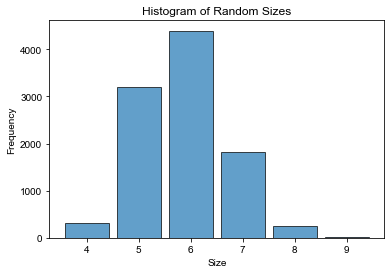

In [963]:
# Sup 6A related
# 'bins' parameter to be the range of unique values in the data will make the histogram more compact
bins = np.arange(random_sizes.min(), random_sizes.max() + 2) - 0.5  # +2 and -0.5 to include the rightmost edge

plt.hist(random_sizes, bins=bins, alpha=0.7, rwidth=0.85, edgecolor='black')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Histogram of Random Sizes')
plt.xticks(np.arange(random_sizes.min(), random_sizes.max() + 1))  # To align xticks in the middle of the bars
plt.show()

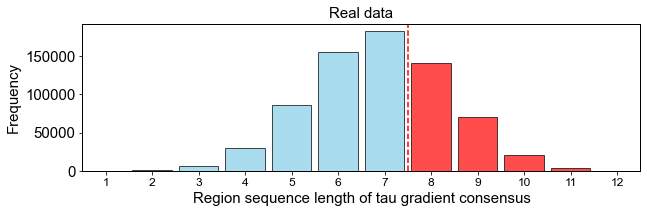

In [1277]:
# Sup 6A
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"


# Get the sizes and their frequencies from the ordered_regions_storage
original_sizes = [size for size, regions in ordered_regions_storage.items() for _ in regions]

# Prepare bins
bins = np.arange(min(original_sizes + list(random_sizes)), max(original_sizes + list(random_sizes)) + 2) 

# Calculate histogram data
counts, bins = np.histogram(original_sizes, bins=bins)

# Create an array for bar colors
colors = ['red' if b >= min_significant_size  else 'skyblue' for b in bins[:-1]]

# Create a figure with aspect ratio 2:1
plt.figure(figsize=(10, 3))

# Plot histograms
plt.bar(bins[:-1] , counts, color=colors, width=0.85, edgecolor='black', alpha=0.7)

# Set labels and title
plt.axvline(x=min_significant_size - 0.5, color='r', linestyle='--')
plt.xlabel('Region sequence length of tau gradient consensus',  fontsize = 15)
plt.ylabel('Frequency',  fontsize = 15)
plt.title("Real data",  fontsize = 15)

plt.xticks(np.arange(min(original_sizes + list(random_sizes)) , max(original_sizes + list(random_sizes)) + 1.5), fontsize = 12)  # To align xticks in the middle of the bars
plt.yticks(fontsize=15)
plt.xlim(xmin=0.5, xmax=12.5)

# Make the border thicker and black
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)
    spine.set_color('black')

plt.subplots_adjust(bottom=0.2)
plt.savefig(dir2 + "Real_data_motif_length_histogram.png", transparent=True, dpi=300)


# Show the plot
plt.show()


In [965]:
# Let's calculate the proportion of trials where the region size was greater than or equal to each possible size
sizes, counts = np.unique(random_sizes, return_counts=True)
cumulative_counts = np.cumsum(counts[::-1])[::-1]  # Reverse, cumulatively sum, and reverse again
proportions = cumulative_counts / len(random_sizes)

# Now find the size where the proportion first drops below 0.05
significance_threshold = 0.05
significant_sizes = sizes[proportions < significance_threshold]
if len(significant_sizes) > 0:
    min_significant_size = significant_sizes[0]
else:
    min_significant_size = None

min_significant_size

8

In [1150]:
proportions

array([1.    , 0.9683, 0.6478, 0.2082, 0.0269, 0.0012])

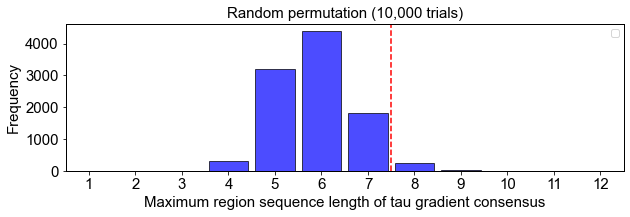

In [1273]:
# Sup 6A 
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

# Simulating the data as I don't have access to the real variables

min_significant_size = 8 

# Prepare bins
bins = np.arange(1, 13)  # From 1 to 12

# Create an array for bar colors
colors = ['red' if b >= 10 else 'blue' for b in bins[:-1]]

# Create a figure with aspect ratio 2:1
plt.figure(figsize=(10, 3))

# Calculate histogram data
counts, _ = np.histogram(random_sizes, bins=bins)

# Plot histograms
plt.bar(bins[:-1], counts, color=colors, width=0.85, edgecolor='black', alpha=0.7)  # Shift bins by 0.5 to the right

# Draw the vertical line where min_significant_size is
if min_significant_size is not None:
    plt.axvline(x=min_significant_size - 0.5, color='r', linestyle='--',)
    plt.legend()  # Show the legend

# Set labels and title
plt.xlabel('Maximum region sequence length of tau gradient consensus', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title("Random permutation (10,000 trials)", fontsize=15)
plt.xticks(np.arange(1, 13), fontsize=15)  # To align xticks in the middle of the bars
plt.yticks(fontsize=15)
plt.xlim(xmin=0.5, xmax=12.5) 

# Make the border thicker and black
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)
    spine.set_color('black')
    
plt.subplots_adjust(bottom=0.2)
plt.savefig(dir2 + "Random_data_motif_max_length_histogram.png", transparent=True, dpi=300)
# Show the plot
plt.show()


In [154]:
# Calculate FDR < 0.05 length.
from scipy import stats

W, p = stats.shapiro(random_sizes)

print(f"W-statistic: {W}")
print(f"p-value: {p}")

if p > 0.05:
    print("The data follows a normal distribution.")
else:
    print("The data does not follow a normal distribution.")

W-statistic: 0.8571816682815552
p-value: 3.768254668035514e-29
The data does not follow a normal distribution.


In [180]:
# compute the Z-score
random_mean = np.mean(random_sizes)
random_std = np.std(random_sizes)
z_score = (original_size - random_mean) / random_std

# compute the p-value
p_value = 1 - stats.norm.cdf(z_score)  # because we're looking for the probability of having a value greater than the original_size

z_score, p_value

(6.451492488291958, 5.5376925267580646e-11)

In [80]:
# pTau gradient consensu analysis. Please read the Materail and methods parts.
# Find non-overlapped smaller length patterns.

import numpy as np
from itertools import combinations

# input datasets
datasets = [tau_region1_rank, tau_region2_rank, tau_region3_rank]

def is_ordered(indexes):
    """Check if the values at the given indexes are in the same order in all datasets."""
    values = [dataset[indexes] for dataset in datasets]
    orders = [np.argsort(value) for value in values]
    return all((order == orders[0]).all() for order in orders)

ordered_regions = []

# Initial condition: each index by itself is an ordered region.
ordered_regions = [[i] for i in range(len(datasets[0]))]

# Increase the size of the regions one by one.
for size in range(2, len(datasets[0]) + 1):
    new_ordered_regions = []
    for region in ordered_regions:
        for i in range(region[-1] + 1, len(datasets[0])):  # only append larger indexes to keep the regions ordered
            new_region = region + [i]
            if is_ordered(new_region):
                new_ordered_regions.append(new_region)
    if new_ordered_regions:
        ordered_regions = new_ordered_regions  # update if we found larger ordered regions
    else:
        break  # stop if we couldn't find any larger ordered regions

for region in ordered_regions:
    print(", ".join(regionname_list2[index][0] for index in region))

ENTm5, TEa5, DG-sg, PRE, ENTl3, TEa4, ENTl6a, ENTl5, ENTl1, ECT6a, EPd, CTXsp
ENTm5, TEa5, DG-sg, PRE, ENTl3, TEa4, ENTl6a, ENTl5, ECT6a, EPd, CTXsp, BMAa
ENTm5, TEa5, DG-sg, PRE, ENTl3, TEa4, ENTl6a, ENTl1, ECT5, ECT6a, EPd, CTXsp
ENTm5, TEa5, DG-sg, PRE, ENTl3, TEa4, ENTl6a, ECT5, ECT6a, EPd, CTXsp, BMAa
ENTm5, TEa5, DG-sg, PRE, ENTl3, TEa4, ENTl5, ENTl1, ECT6a, EPd, CTXsp, PIR
ENTm5, TEa5, DG-sg, PRE, ENTl3, TEa4, ENTl5, ECT6a, EPd, CTXsp, PIR, BMAa
ENTm5, TEa5, DG-sg, PRE, ENTl3, TEa4, ENTl1, ECT5, ECT6a, EPd, CTXsp, PIR
ENTm5, TEa5, DG-sg, PRE, ENTl3, TEa4, ECT5, ECT6a, EPd, CTXsp, PIR, BMAa
ENTm5, TEa5, DG-sg, PRE, TEa4, ENTl6a, ENTl5, ENTl1, ECT2/3, ECT6a, EPd, CTXsp
ENTm5, TEa5, DG-sg, PRE, TEa4, ENTl6a, ENTl5, ENTl1, ECT6a, EPd, BLAp, CTXsp
ENTm5, TEa5, DG-sg, PRE, TEa4, ENTl6a, ENTl5, ECT2/3, ECT6a, EPd, CTXsp, BMAa
ENTm5, TEa5, DG-sg, PRE, TEa4, ENTl6a, ENTl5, ECT6a, EPd, BLAp, CTXsp, BMAa
ENTm5, TEa5, DG-sg, PRE, TEa4, ENTl6a, ENTl1, ECT2/3, ECT5, ECT6a, EPd, CTXsp
ENTm5, T

In [50]:
# pTau gradient consensu analysis. Please read the Materail and methods parts.
# Find non-overlapped smaller length patterns.

import numpy as np
from itertools import combinations

# input datasets
datasets = [tau_region1_rank, tau_region2_rank, tau_region3_rank]

def is_ordered(indexes):
    """Check if the values at the given indexes are in the same order in all datasets."""
    values = [dataset[indexes] for dataset in datasets]
    orders = [np.argsort(value) for value in values]
    return all((order == orders[0]).all() for order in orders)

ordered_regions = []

# Initial condition: each index by itself is an ordered region.
ordered_regions = [[i] for i in range(len(datasets[0]))]

# Increase the size of the regions one by one.
for size in range(2, len(datasets[0]) + 1):
    new_ordered_regions = []
    for region in ordered_regions:
        for i in range(region[-1] + 1, len(datasets[0])):  # only append larger indexes to keep the regions ordered
            new_region = region + [i]
            if is_ordered(new_region):
                new_ordered_regions.append(new_region)
    if new_ordered_regions:
        ordered_regions = new_ordered_regions  # update if we found larger ordered regions
    else:
        break  # stop if we couldn't find any larger ordered regions

for region in ordered_regions:
    print(", ".join(regionname_list2[index][0] for index in region))

ENTm5, TEa5, DG-sg, PRE, ENTl3, TEa4, ENTl6a, ENTl5, ENTl1, ECT6a, EPd, CTXsp
ENTm5, TEa5, DG-sg, PRE, ENTl3, TEa4, ENTl6a, ENTl5, ECT6a, EPd, CTXsp, BMAa
ENTm5, TEa5, DG-sg, PRE, ENTl3, TEa4, ENTl6a, ENTl1, ECT5, ECT6a, EPd, CTXsp
ENTm5, TEa5, DG-sg, PRE, ENTl3, TEa4, ENTl6a, ECT5, ECT6a, EPd, CTXsp, BMAa
ENTm5, TEa5, DG-sg, PRE, ENTl3, TEa4, ENTl5, ENTl1, ECT6a, EPd, CTXsp, PIR
ENTm5, TEa5, DG-sg, PRE, ENTl3, TEa4, ENTl5, ECT6a, EPd, CTXsp, PIR, BMAa
ENTm5, TEa5, DG-sg, PRE, ENTl3, TEa4, ENTl1, ECT5, ECT6a, EPd, CTXsp, PIR
ENTm5, TEa5, DG-sg, PRE, ENTl3, TEa4, ECT5, ECT6a, EPd, CTXsp, PIR, BMAa
ENTm5, TEa5, DG-sg, PRE, TEa4, ENTl6a, ENTl5, ENTl1, ECT2/3, ECT6a, EPd, CTXsp
ENTm5, TEa5, DG-sg, PRE, TEa4, ENTl6a, ENTl5, ENTl1, ECT6a, EPd, BLAp, CTXsp
ENTm5, TEa5, DG-sg, PRE, TEa4, ENTl6a, ENTl5, ECT2/3, ECT6a, EPd, CTXsp, BMAa
ENTm5, TEa5, DG-sg, PRE, TEa4, ENTl6a, ENTl5, ECT6a, EPd, BLAp, CTXsp, BMAa
ENTm5, TEa5, DG-sg, PRE, TEa4, ENTl6a, ENTl1, ECT2/3, ECT5, ECT6a, EPd, CTXsp
ENTm5, T

In [132]:
# pTau gradient consensu analysis. Please read the Materail and methods parts.
# Find non-overlapped smaller length patterns.

from collections import Counter
from itertools import combinations

# Create a counter to count the number of shared regions between patterns
shared_region_counts = Counter()

# For each pair of patterns
for pattern1, pattern2 in combinations(ordered_regions, 2):
    # Calculate the number of shared regions
    shared_regions = set(pattern1) & set(pattern2)
    # Update the counter
    shared_region_counts[len(shared_regions)] += 1

# Calculate the average number of shared regions per pattern
average_shared_regions = sum(count * shared_regions for shared_regions, count in shared_region_counts.items()) / len(ordered_regions)

# Calculate the ranking of patterns based on the number of shared regions
pattern_ranking = sorted(ordered_regions, key=lambda pattern: len(set(pattern) & set(ordered_regions[0])), reverse=True)

# Print the results
average_shared_regions, pattern_ranking[:5]

(83.33333333333333,
 [[2, 3, 4, 9, 12, 15, 18, 21, 28, 30],
  [2, 3, 4, 9, 12, 15, 18, 23, 28, 30],
  [2, 3, 9, 12, 15, 18, 21, 27, 28, 30],
  [3, 4, 9, 12, 15, 18, 21, 26, 28, 30],
  [2, 3, 4, 9, 15, 18, 23, 24, 28, 30]])

In [1234]:
# Apply the sorting to all regions and store in a new variable
sorted_region_names = [regionname_list2[region][np.argsort(tau_region1_rank[region])] for region in ordered_regions]

# Print sorted region names
for region in sorted_region_names:
    print(", ".join(map(str, region)))

['CTXsp'], ['ENTl1'], ['DG-sg'], ['PRE'], ['EPd'], ['TEa4'], ['ECT6a'], ['TEa5'], ['ENTl6a'], ['ENTm5'], ['ENTl5'], ['ENTl3']
['CTXsp'], ['BMAa'], ['DG-sg'], ['PRE'], ['EPd'], ['TEa4'], ['ECT6a'], ['TEa5'], ['ENTl6a'], ['ENTm5'], ['ENTl5'], ['ENTl3']
['CTXsp'], ['ENTl1'], ['DG-sg'], ['PRE'], ['EPd'], ['TEa4'], ['ECT6a'], ['TEa5'], ['ENTl6a'], ['ENTm5'], ['ECT5'], ['ENTl3']
['CTXsp'], ['BMAa'], ['DG-sg'], ['PRE'], ['EPd'], ['TEa4'], ['ECT6a'], ['TEa5'], ['ENTl6a'], ['ENTm5'], ['ECT5'], ['ENTl3']
['CTXsp'], ['ENTl1'], ['DG-sg'], ['PRE'], ['EPd'], ['TEa4'], ['ECT6a'], ['TEa5'], ['PIR'], ['ENTm5'], ['ENTl5'], ['ENTl3']
['CTXsp'], ['BMAa'], ['DG-sg'], ['PRE'], ['EPd'], ['TEa4'], ['ECT6a'], ['TEa5'], ['PIR'], ['ENTm5'], ['ENTl5'], ['ENTl3']
['CTXsp'], ['ENTl1'], ['DG-sg'], ['PRE'], ['EPd'], ['TEa4'], ['ECT6a'], ['TEa5'], ['PIR'], ['ENTm5'], ['ECT5'], ['ENTl3']
['CTXsp'], ['BMAa'], ['DG-sg'], ['PRE'], ['EPd'], ['TEa4'], ['ECT6a'], ['TEa5'], ['PIR'], ['ENTm5'], ['ECT5'], ['ENTl3']
['CTXsp'], [

In [52]:
# pTau gradient consensu analysis. Please read the Materail and methods parts.
# Find non-overlapped smaller length patterns.

import numpy as np
from itertools import combinations

# input datasets
datasets = [tau_region1_rank, tau_region2_rank, tau_region3_rank]

def is_ordered(indexes):
    """Check if the values at the given indexes are in the same order in all datasets."""
    values = [dataset[np.array(indexes)] for dataset in datasets]  # use np.array() for advanced indexing
    orders = [np.argsort(value) for value in values]
    return all((order == orders[0]).all() for order in orders)

# Initialize the storage for ordered regions of each length
ordered_regions_storage = {}

# Initial condition: each index by itself is an ordered region.
ordered_regions = [[i] for i in range(len(datasets[0]))]
ordered_regions_storage[1] = ordered_regions

# Increase the size of the regions one by one.
for size in range(2, len(datasets[0]) + 1):
    new_ordered_regions = []
    for region in ordered_regions:
        for i in range(region[-1] + 1, len(datasets[0])):  # only append larger indexes to keep the regions ordered
            new_region = region + [i]
            if is_ordered(new_region):
                new_ordered_regions.append(new_region)
    if new_ordered_regions:
        ordered_regions = new_ordered_regions  # update if we found larger ordered regions
        ordered_regions_storage[size] = ordered_regions  # store the ordered regions of this size
    else:
        break  # stop if we couldn't find any larger ordered regions


In [668]:
ordered_regions_storage

{1: [[0],
  [1],
  [2],
  [3],
  [4],
  [5],
  [6],
  [7],
  [8],
  [9],
  [10],
  [11],
  [12],
  [13],
  [14],
  [15],
  [16],
  [17],
  [18],
  [19],
  [20],
  [21],
  [22],
  [23],
  [24],
  [25],
  [26],
  [27],
  [28],
  [29],
  [30],
  [31],
  [32],
  [33],
  [34],
  [35],
  [36],
  [37],
  [38],
  [39],
  [40],
  [41],
  [42],
  [43],
  [44],
  [45],
  [46]],
 2: [[0, 1],
  [0, 2],
  [0, 3],
  [0, 4],
  [0, 5],
  [0, 6],
  [0, 13],
  [0, 14],
  [0, 15],
  [0, 16],
  [0, 17],
  [0, 18],
  [0, 19],
  [0, 20],
  [0, 21],
  [0, 23],
  [0, 24],
  [0, 26],
  [0, 27],
  [0, 28],
  [0, 30],
  [0, 31],
  [0, 34],
  [0, 35],
  [0, 36],
  [0, 37],
  [0, 38],
  [0, 39],
  [0, 42],
  [0, 44],
  [0, 45],
  [0, 46],
  [1, 3],
  [1, 4],
  [1, 5],
  [1, 8],
  [1, 9],
  [1, 10],
  [1, 11],
  [1, 12],
  [1, 15],
  [1, 18],
  [1, 20],
  [1, 21],
  [1, 22],
  [1, 23],
  [1, 25],
  [1, 27],
  [1, 29],
  [1, 30],
  [1, 31],
  [1, 32],
  [1, 37],
  [1, 38],
  [1, 39],
  [1, 40],
  [1, 41],
  [1, 42],


In [1212]:
# Apply the sorting to all regions and store in a new variable
sorted_region_names = [regionname_list2[region][np.argsort(tau_region1_rank[region])] for region in ordered_regions_storage[12]]

# Print sorted region names
for region in sorted_region_names:
    print(", ".join(map(str, region)))

['CTXsp'], ['ENTl1'], ['DG-sg'], ['PRE'], ['EPd'], ['TEa4'], ['ECT6a'], ['TEa5'], ['ENTl6a'], ['ENTm5'], ['ENTl5'], ['ENTl3']
['CTXsp'], ['COApm'], ['DG-sg'], ['PRE'], ['EPd'], ['TEa4'], ['ECT6a'], ['TEa5'], ['ENTl6a'], ['ENTm5'], ['ENTl5'], ['ENTl3']
['CTXsp'], ['ENTl1'], ['DG-sg'], ['PRE'], ['EPd'], ['TEa4'], ['ECT6a'], ['TEa5'], ['ENTl6a'], ['ENTm5'], ['ECT5'], ['ENTl3']
['CTXsp'], ['COApm'], ['DG-sg'], ['PRE'], ['EPd'], ['TEa4'], ['ECT6a'], ['TEa5'], ['ENTl6a'], ['ENTm5'], ['ECT5'], ['ENTl3']
['CTXsp'], ['ENTl1'], ['DG-sg'], ['PRE'], ['EPd'], ['TEa4'], ['ECT6a'], ['TEa5'], ['PIR'], ['ENTm5'], ['ENTl5'], ['ENTl3']
['CTXsp'], ['COApm'], ['DG-sg'], ['PRE'], ['EPd'], ['TEa4'], ['ECT6a'], ['TEa5'], ['PIR'], ['ENTm5'], ['ENTl5'], ['ENTl3']
['CTXsp'], ['ENTl1'], ['DG-sg'], ['PRE'], ['EPd'], ['TEa4'], ['ECT6a'], ['TEa5'], ['PIR'], ['ENTm5'], ['ECT5'], ['ENTl3']
['CTXsp'], ['COApm'], ['DG-sg'], ['PRE'], ['EPd'], ['TEa4'], ['ECT6a'], ['TEa5'], ['PIR'], ['ENTm5'], ['ECT5'], ['ENTl3']
['CTXsp'

In [57]:
# pTau gradient consensu analysis. Please read the Materail and methods parts.
# Find non-overlapped smaller length patterns.

from multiprocessing import Pool

# Helper function to check if a region is a subset of any region in a list of regions
def is_subset_of_any(args):
    region_set, regions = args
    return any(region_set.issubset(set(r)) for r in regions)

def compute_exclusive_regions(args):
    region, larger_regions = args
    region_set = set(region)  # compute the set once
    if not any(is_subset_of_any((region_set, lr)) for lr in larger_regions):
        return region
    else:
        return None

# Compute exclusive ordered regions
exclusive_ordered_regions = {}

start_time = datetime.datetime.now()
print("Start time:", start_time)

# Create a multiprocessing Pool
with Pool(40) as pool:
    # For each length, find the regions that are not subsets of any larger regions
    for length, regions in ordered_regions_storage.items():
        print(length)
        end_time = datetime.datetime.now()
        print("During time:", end_time - start_time)
        exclusive_regions = []
        
        # Compute larger_regions once for each length
        larger_regions = [r for l, r in ordered_regions_storage.items() if l > length]

        # Use the Pool's map function to parallelize the computation
        results = pool.map(compute_exclusive_regions, [(region, larger_regions) for region in regions])

        # Filter out the None results
        exclusive_regions = [r for r in results if r is not None]
        
        exclusive_ordered_regions[length] = exclusive_regions

print(exclusive_ordered_regions)


1
2
3
4
5
6
7
8
9
10
11
12
{1: [], 2: [], 3: [], 4: [], 5: [], 6: [[0, 4, 13, 15, 20, 39], [0, 4, 13, 15, 30, 39], [0, 4, 13, 15, 38, 39], [0, 4, 15, 20, 28, 39], [0, 4, 15, 28, 30, 39], [0, 4, 15, 28, 38, 39], [0, 4, 20, 28, 39, 45], [0, 4, 28, 30, 39, 45], [0, 4, 28, 38, 39, 45], [2, 4, 7, 13, 20, 39], [2, 4, 7, 13, 30, 39], [2, 4, 7, 13, 38, 39], [2, 4, 7, 20, 26, 39], [2, 4, 7, 26, 30, 39], [2, 4, 7, 26, 38, 39], [2, 4, 10, 13, 20, 39], [2, 4, 10, 13, 30, 39], [2, 4, 10, 13, 38, 39], [2, 4, 10, 20, 26, 39], [2, 4, 10, 26, 30, 39], [2, 4, 10, 26, 38, 39], [2, 4, 13, 20, 39, 40], [2, 4, 13, 20, 39, 43], [2, 4, 13, 30, 39, 40], [2, 4, 13, 30, 39, 43], [2, 4, 13, 38, 39, 40], [2, 4, 13, 38, 39, 43], [2, 4, 20, 26, 39, 40], [2, 4, 20, 26, 39, 43], [2, 4, 26, 30, 39, 40], [2, 4, 26, 30, 39, 43], [2, 4, 26, 38, 39, 40], [2, 4, 26, 38, 39, 43], [2, 6, 9, 13, 38, 39], [2, 6, 9, 26, 38, 39], [2, 7, 9, 13, 38, 39], [2, 7, 9, 26, 38, 39], [2, 9, 13, 38, 39, 40], [2, 9, 26, 38, 39, 40], [2, 11,

Length: 8


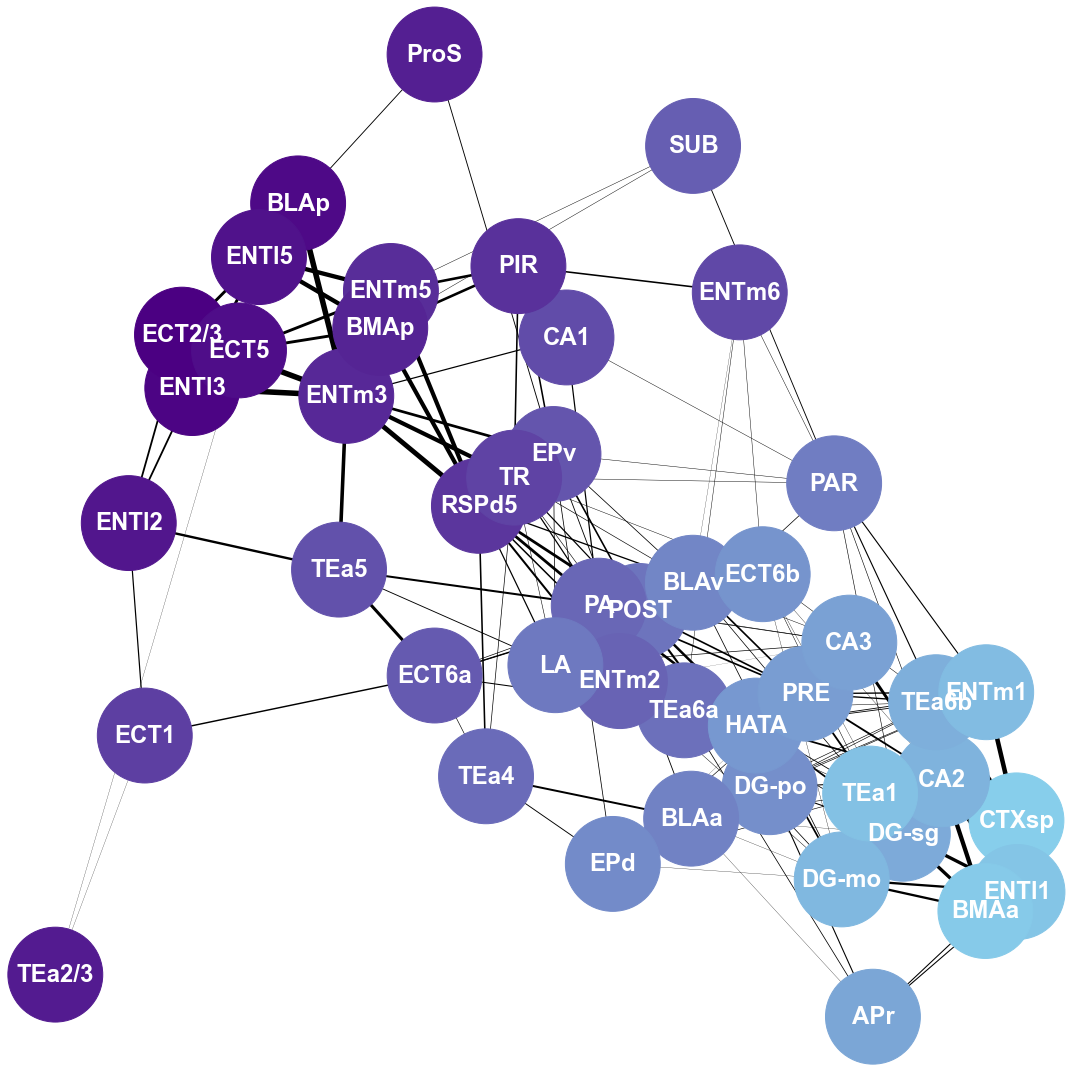

Length: 9


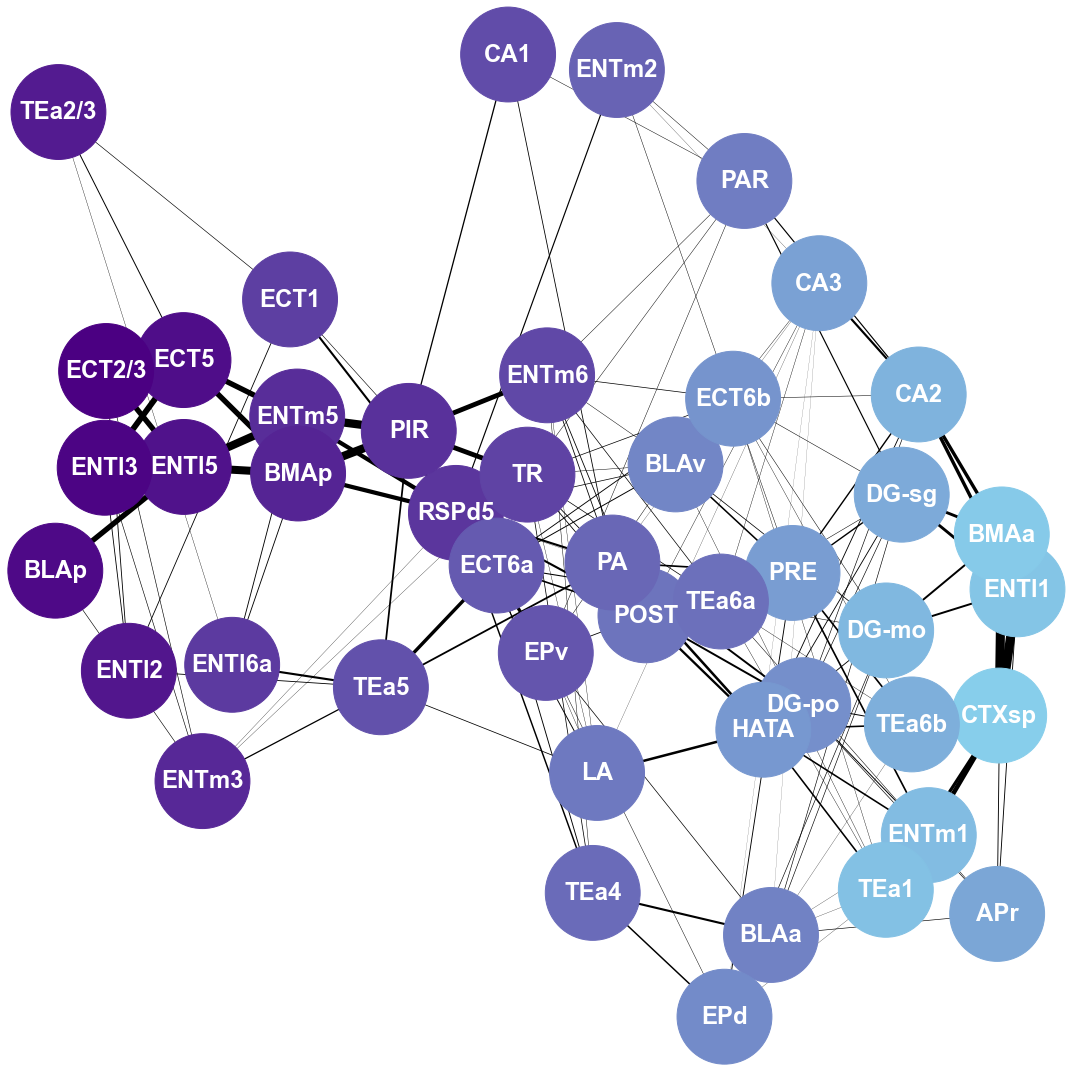

Length: 10


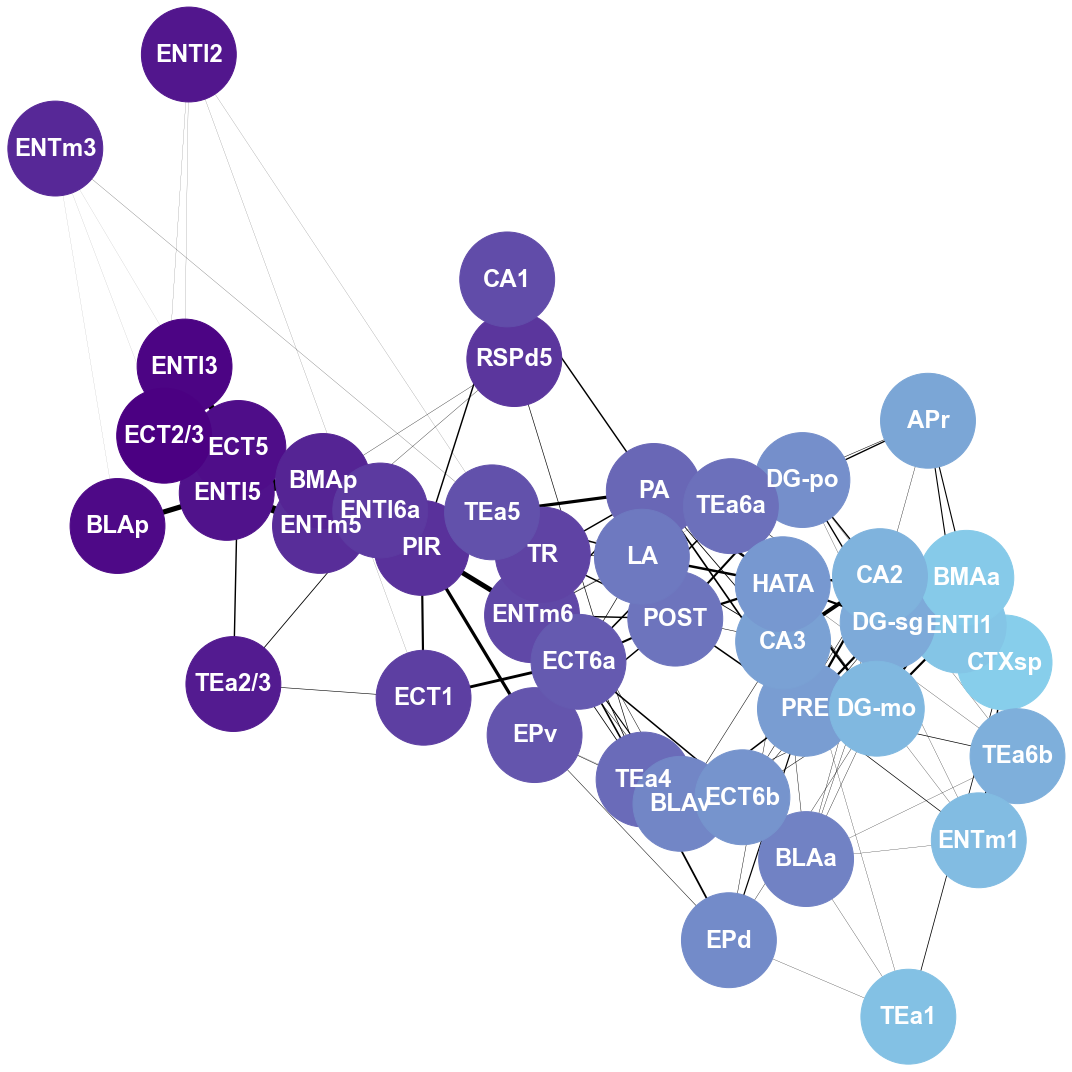

Length: 11


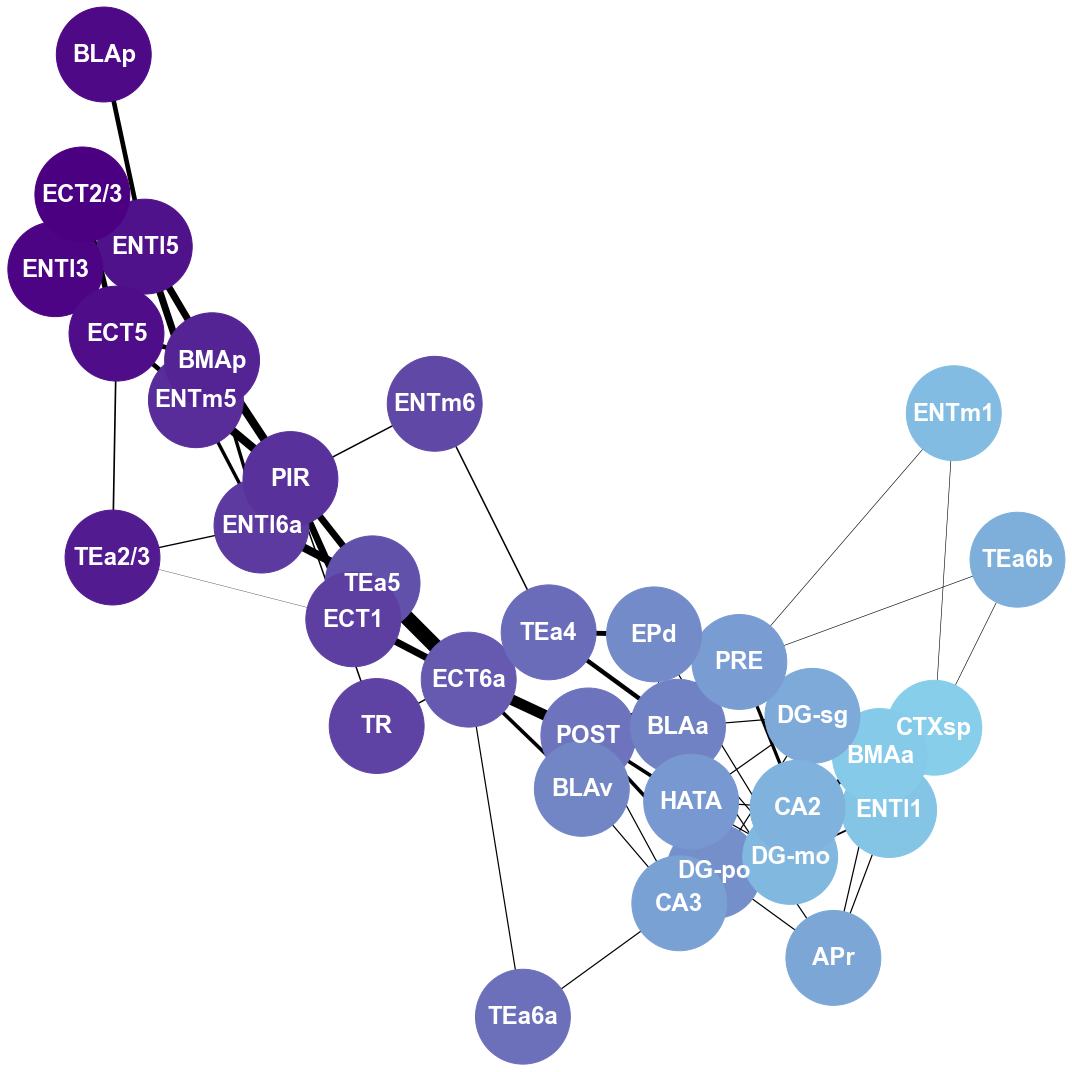

Length: 12


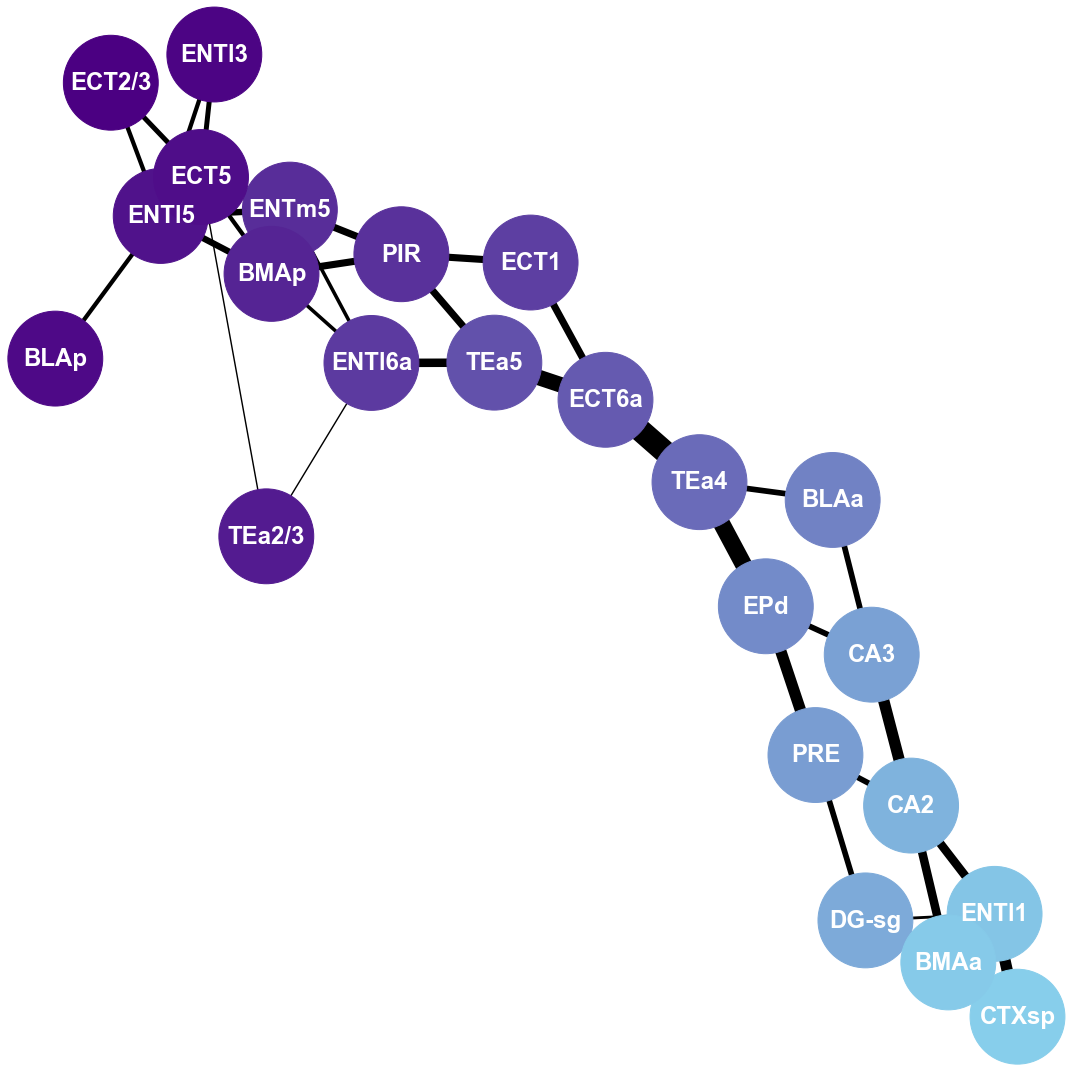

In [1419]:
# pTau gradient consensu analysis. Please read the Materail and methods parts.
# Visualize as graph networks.(Sup 6C)

# Define function to create a graph for a given ordered_regions set
import networkx as nx

highlight_regions =['CTXsp',
 'BMAa',
 'DG-sg',
 'PRE',
 'EPd',
 'TEa4',
 'ECT6a',
 'TEa5',
 'ENTl6a',
 'ENTm5',
 'ENTl5',
 'ENTl3']


def create_graph(ordered_regions):
    # Create a mapping from node number to region name
    node_label_mapping = {i: regionname_list2[i][0] for i in range(len(regionname_list2))}

    # Create the sorted region mapping
    sorted_region_mapping = {node_label_mapping[region[i]]: tau_region_mean_rank[region][i] for region in ordered_regions for i in range(len(region))}

    # Create a new, empty undirected graph
    G = nx.Graph()

    # Add nodes and edges with their frequencies
    for region in ordered_regions:
        sorted_region = np.argsort(tau_region1_rank[region])
        for i in range(len(region) - 1):
            # Map node numbers to region names
            start_node = node_label_mapping[region[sorted_region[i]]]
            end_node = node_label_mapping[region[sorted_region[i + 1]]]

            if G.has_edge(start_node, end_node):
                # we added this one before, just increase the weight by one
                G[start_node][end_node]['weight'] += 1
            else:
                # new edge. add with weight=1
                G.add_edge(start_node, end_node, weight=1)
    
    return G, node_label_mapping, sorted_region_mapping

# Define function to draw a graph
def draw_graph(G, node_label_mapping, sorted_region_mapping, size):
    # get rank values and normalize to [0,1]
    #node_ranks = [sorted_region_mapping[node] for node in G.nodes()]
    #node_ranks_normalized = (node_ranks - np.min(node_ranks)) / (np.max(node_ranks) - np.min(node_ranks))
    
    node_ranks = [sorted_region_mapping[node] for node in G.nodes()]
    #print(node_ranks)
    #node_ranks_normalized = (node_ranks - np.min(node_ranks)) / (np.max(node_ranks) - np.min(node_ranks))
    node_ranks_normalized = node_ranks

    # create color map
    colors = ["skyblue", "indigo"]
    cmap = LinearSegmentedColormap.from_list("mycmap", colors, N=len(tau_region1_rank))#256)

    # map normalized rank values to colors
    node_colors = [cmap(rank) for rank in node_ranks_normalized]

    # Draw the graph
    plt.figure(figsize=(15, 15))  # Adjust the figure size
    
    pos = nx.spring_layout(G, seed=4,  k=1.3)  # positions for all nodes



    # nodes, with colors specified and increased size
    nx.draw_networkx_nodes(G, pos, node_size=9000, node_color=node_colors)

    # normalize edge weights by total weight
    edges = G.edges(data=True)
    total_weight = sum(d['weight'] for u, v, d in edges)
    
    scaling_factor = 250
    
    weights = [(d['weight']/total_weight) * scaling_factor for u, v, d in edges]

    # edges with reduced width
    nx.draw_networkx_edges(G, pos, width=weights, edge_cmap=plt.cm.Blues)

    # labels with white font color
    nx.draw_networkx_labels(G, pos, font_size=24, verticalalignment='center', font_color='white', font_weight='bold')

    # remove the box around the figure
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    
    plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)  # Adjust the plot margins
    
    plt.savefig(dir2 + "Motif_length_" +str(size)+ "_network_graph.png", transparent=True, dpi=300)

    plt.show()

# Generate and draw graphs for lengths 7 to 10
for size in range(8, 13):
    print(f"Length: {size}")
    G, node_label_mapping, sorted_region_mapping = create_graph(exclusive_ordered_regions[size])
    draw_graph(G, node_label_mapping, sorted_region_mapping, size)
    

In [1214]:
sorted_region_mapping 

{'ENTm5': 38,
 'TEa5': 30,
 'DG-sg': 8,
 'PRE': 12,
 'ENTl3': 47,
 'TEa4': 24,
 'ENTl6a': 35,
 'ENTl5': 44,
 'ENTl1': 2,
 'ECT6a': 28,
 'EPd': 16,
 'CTXsp': 0,
 'COApm': 11,
 'ECT5': 45,
 'PIR': 37,
 'ECT2/3': 48,
 'BLAp': 46,
 'CA2': 6,
 'CA3': 10,
 'BLAa': 18,
 'ECT1': 34,
 'TEa2/3': 42,
 'BMAp': 40}

Length: 12


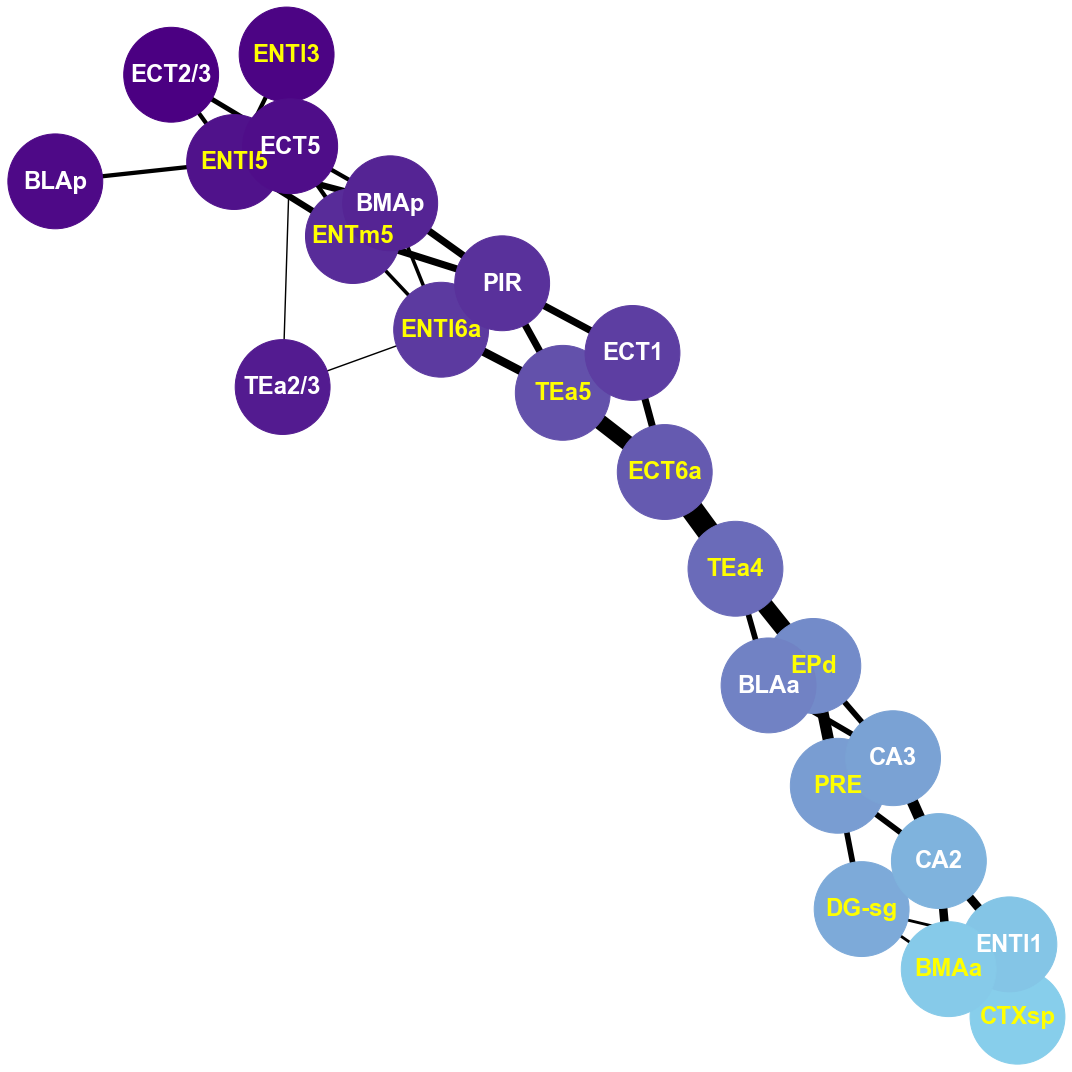

In [1236]:
# Longest sequence length. Fig.2F related
# Define function to create a graph for a given ordered_regions set
import networkx as nx

highlight_regions =['CTXsp',
 'BMAa',
 'DG-sg',
 'PRE',
 'EPd',
 'TEa4',
 'ECT6a',
 'TEa5',
 'ENTl6a',
 'ENTm5',
 'ENTl5',
 'ENTl3']


def create_graph(ordered_regions):
    # Create a mapping from node number to region name
    node_label_mapping = {i: regionname_list2[i][0] for i in range(len(regionname_list2))}

    # Create the sorted region mapping
    sorted_region_mapping = {node_label_mapping[region[i]]: tau_region_mean_rank[region][i] for region in ordered_regions for i in range(len(region))}

    # Create a new, empty undirected graph
    G = nx.Graph()

    # Add nodes and edges with their frequencies
    for region in ordered_regions:
        sorted_region = np.argsort(tau_region1_rank[region])
        for i in range(len(region) - 1):
            # Map node numbers to region names
            start_node = node_label_mapping[region[sorted_region[i]]]
            end_node = node_label_mapping[region[sorted_region[i + 1]]]

            if G.has_edge(start_node, end_node):
                # we added this one before, just increase the weight by one
                G[start_node][end_node]['weight'] += 1
            else:
                # new edge. add with weight=1
                G.add_edge(start_node, end_node, weight=1)
    
    return G, node_label_mapping, sorted_region_mapping

# Define function to draw a graph
def draw_graph(G, node_label_mapping, sorted_region_mapping, size):
    # get rank values and normalize to [0,1]
    node_ranks = [sorted_region_mapping[node] for node in G.nodes()]
    node_ranks_normalized = (node_ranks - np.min(node_ranks)) / (np.max(node_ranks) - np.min(node_ranks))

    # create color map
    colors = ["skyblue", "indigo"]
    cmap = LinearSegmentedColormap.from_list("mycmap", colors, N=256)

    # map normalized rank values to colors
    node_colors = [cmap(rank) for rank in node_ranks_normalized]

    # Draw the graph
    plt.figure(figsize=(15, 15))  # Adjust the figure size
    
    pos = nx.spring_layout(G, seed=4,  k=1)  # positions for all nodes

    # nodes, with colors specified and increased size
    nx.draw_networkx_nodes(G, pos, node_size=9000, node_color=node_colors)

    # normalize edge weights by total weight
    edges = G.edges(data=True)
    total_weight = sum(d['weight'] for u, v, d in edges)
    
    scaling_factor = 250
    
    weights = [(d['weight']/total_weight) * scaling_factor for u, v, d in edges]

    # edges with reduced width
    nx.draw_networkx_edges(G, pos, width=weights, edge_cmap=plt.cm.Blues)

    # labels with white font color or red if the region is in highlight_regions
    for node, (x, y) in pos.items():

        plt.text(x, y, node, fontsize=24, 
                 verticalalignment='center', 
                 horizontalalignment='center',  # add this line
                 color='yellow' if node in highlight_regions else 'white', 
                 weight='bold')

    # remove the box around the figure
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    
    plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)  # Adjust the plot margins
    
    #plt.savefig(dir2 + "Motif_length_" +str(size)+ "_network_graph.png", transparent=True, dpi=300)

    plt.show()

# Generate and draw graphs for lengths 7 to 10
for size in range(12, 13):
    print(f"Length: {size}")
    G, node_label_mapping, sorted_region_mapping = create_graph(exclusive_ordered_regions[size])
    draw_graph(G, node_label_mapping, sorted_region_mapping, size)
    

1
[0, 2, 8, 11, 15, 22, 26, 28, 33, 36, 42, 45, 1, 43, 35, 46, 44, 6, 10, 17, 32, 40, 38]


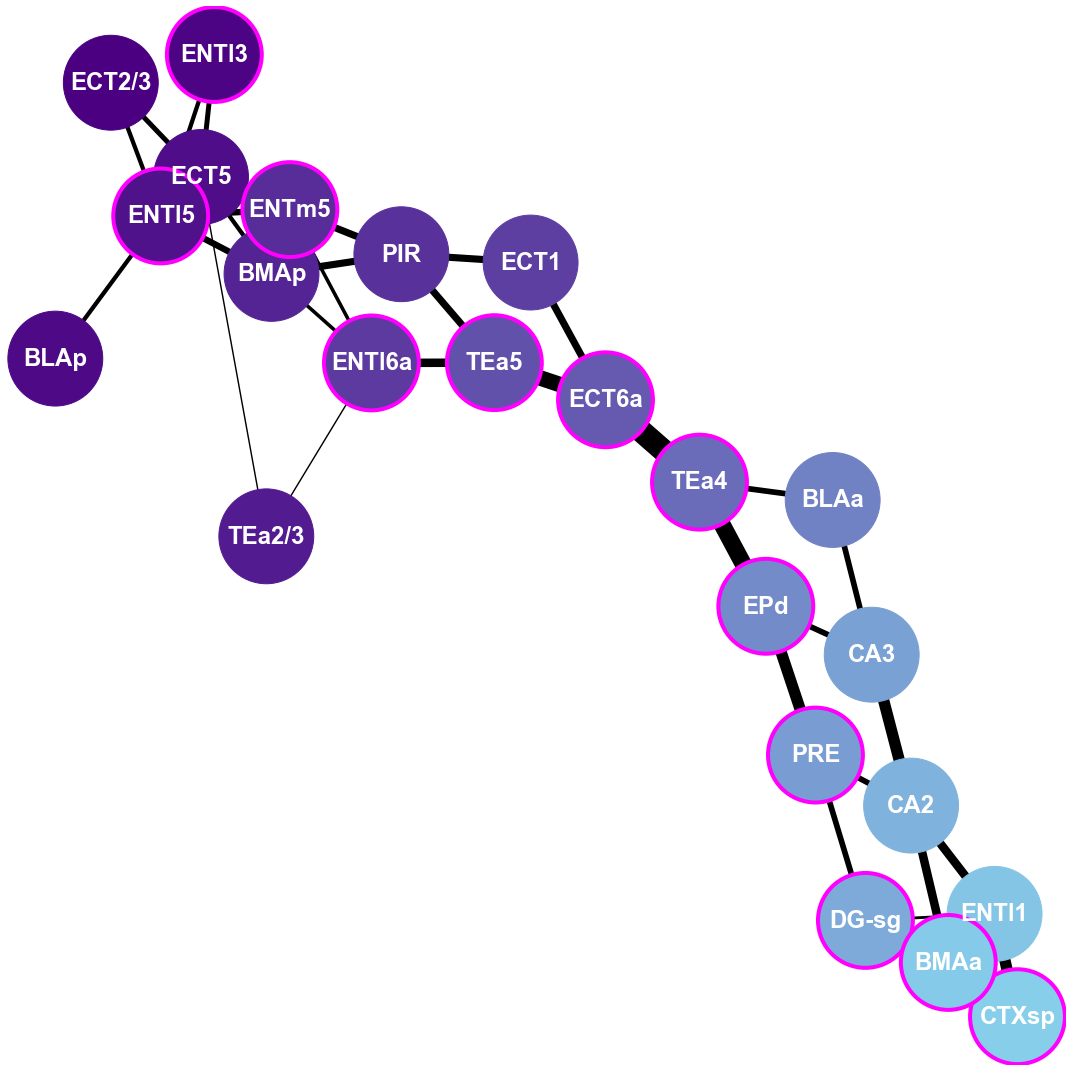

In [1414]:
# Longest sequence length. Fig.2F 

# Define function to draw a graph
def draw_graph(G, node_label_mapping, sorted_region_mapping, size, ii):
    # get rank values and normalize to [0,1]
    node_ranks = [sorted_region_mapping[node] for node in G.nodes()]
    #print(node_ranks)
    #node_ranks_normalized = (node_ranks - np.min(node_ranks)) / (np.max(node_ranks) - np.min(node_ranks))
    node_ranks_normalized = node_ranks
    
    # create color map
    colors = ["skyblue", "indigo"]
    cmap = LinearSegmentedColormap.from_list("mycmap", colors, N=len(tau_region1_rank))

    # map normalized rank values to colors
    node_colors = [cmap(rank) for rank in node_ranks_normalized]

    # Draw the graph
    plt.figure(figsize=(15, 15))  # Adjust the figure size
    
    pos = nx.spring_layout(G, seed=4,  k=1.3)   # positions for all nodes

    # Convert G.nodes() to a list
    node_list = list(G.nodes())

    # Draw the rest of the nodes first
    rest_nodes = [node for node in node_list if node not in highlight_regions]
    nx.draw_networkx_nodes(G, pos, nodelist=rest_nodes, node_size=9000, node_color=[node_colors[node_list.index(node)] for node in rest_nodes])

    # Draw highlighted nodes with red boundaries
    highlight_nodes = [node for node in node_list if node in highlight_regions]
    nx.draw_networkx_nodes(G, pos, nodelist=highlight_nodes, node_size=9000, edgecolors='magenta', linewidths=4, node_color=[node_colors[node_list.index(node)] for node in highlight_nodes], alpha=1.0)

    # normalize edge weights by total weight
    edges = G.edges(data=True)
    total_weight = sum(d['weight'] for u, v, d in edges)
    
    scaling_factor = 250
    
    weights = [(d['weight']/total_weight) * scaling_factor for u, v, d in edges]

    # edges with reduced width
    nx.draw_networkx_edges(G, pos, width=weights, edge_cmap=plt.cm.Blues)

    # labels with white font color
    nx.draw_networkx_labels(G, pos, font_size=24, verticalalignment='center', font_color='white', font_weight='bold')

    # remove the box around the figure
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    
    plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)  # Adjust the plot margins
    plt.savefig(dir2 + "Motif_length_" +str(size)+ "_network_graph.jpeg", transparent=True, dpi=300)
    
    plt.show()
    
    
for i in np.arange(1, 2, 1):
    print(i)
    draw_graph(G, node_label_mapping, sorted_region_mapping, size, i)


In [1260]:
for region in ordered_regions:
    print(", ".join(regionname_list2[index][0] for index in reversed(region)))

CTXsp, EPd, ECT6a, ENTl1, ENTl5, ENTl6a, TEa4, ENTl3, PRE, DG-sg, TEa5, ENTm5
BMAa, CTXsp, EPd, ECT6a, ENTl5, ENTl6a, TEa4, ENTl3, PRE, DG-sg, TEa5, ENTm5
CTXsp, EPd, ECT6a, ECT5, ENTl1, ENTl6a, TEa4, ENTl3, PRE, DG-sg, TEa5, ENTm5
BMAa, CTXsp, EPd, ECT6a, ECT5, ENTl6a, TEa4, ENTl3, PRE, DG-sg, TEa5, ENTm5
PIR, CTXsp, EPd, ECT6a, ENTl1, ENTl5, TEa4, ENTl3, PRE, DG-sg, TEa5, ENTm5
BMAa, PIR, CTXsp, EPd, ECT6a, ENTl5, TEa4, ENTl3, PRE, DG-sg, TEa5, ENTm5
PIR, CTXsp, EPd, ECT6a, ECT5, ENTl1, TEa4, ENTl3, PRE, DG-sg, TEa5, ENTm5
BMAa, PIR, CTXsp, EPd, ECT6a, ECT5, TEa4, ENTl3, PRE, DG-sg, TEa5, ENTm5
CTXsp, EPd, ECT6a, ECT2/3, ENTl1, ENTl5, ENTl6a, TEa4, PRE, DG-sg, TEa5, ENTm5
CTXsp, BLAp, EPd, ECT6a, ENTl1, ENTl5, ENTl6a, TEa4, PRE, DG-sg, TEa5, ENTm5
BMAa, CTXsp, EPd, ECT6a, ECT2/3, ENTl5, ENTl6a, TEa4, PRE, DG-sg, TEa5, ENTm5
BMAa, CTXsp, BLAp, EPd, ECT6a, ENTl5, ENTl6a, TEa4, PRE, DG-sg, TEa5, ENTm5
CTXsp, EPd, ECT6a, ECT5, ECT2/3, ENTl1, ENTl6a, TEa4, PRE, DG-sg, TEa5, ENTm5
BMAa, CT

Length: 12


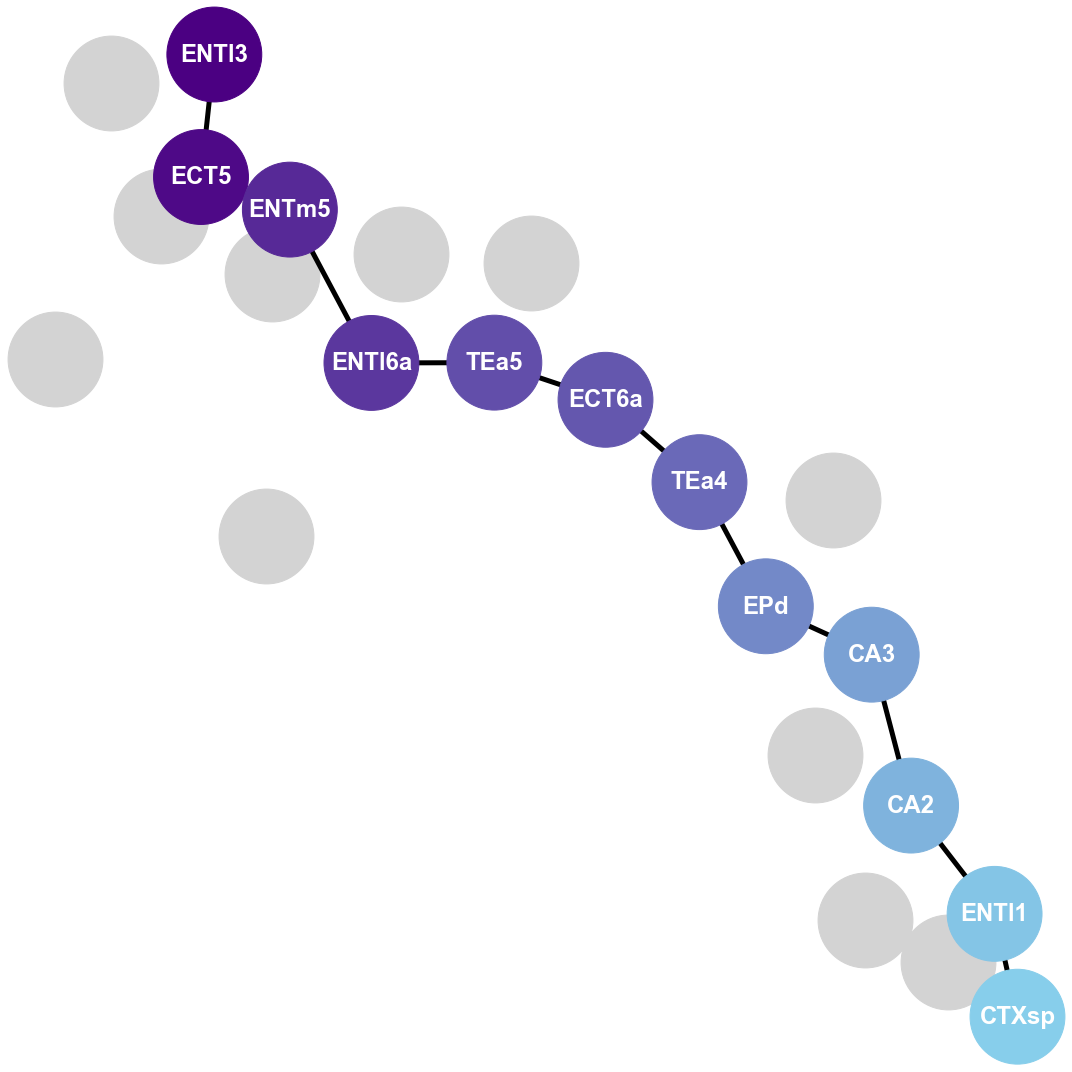

In [1269]:
# # Sup.6B related
#highlight_regions =['CTXsp','BMAa','DG-sg','PRE','EPd','TEa4','ECT6a','TEa5','ENTl6a','ENTm5','ENTl5','ENTl3']
#highlight_regions = ['BMAa', 'CTXsp', 'EPd', 'ECT6a', 'ECT5', 'ECT2/3', 'ENTl6a', 'TEa4', 'PRE', 'CA2', 'TEa5', 'ENTm5']
highlight_regions = ['CTXsp', 'EPd', 'ECT6a', 'ECT5', 'ENTl1', 'CA3', 'ENTl6a', 'TEa4', 'ENTl3', 'CA2', 'TEa5', 'ENTm5']


# Define function to create a graph for a given ordered_regions set
def create_graph(ordered_regions, highlight_regions):
    # Create a mapping from node number to region name
    node_label_mapping = {i: regionname_list2[i][0] for i in range(len(regionname_list2))}

    # Create the sorted region mapping
    sorted_region_mapping = {node_label_mapping[region[i]]: tau_region_mean_rank[region][i] for region in ordered_regions for i in range(len(region))}
    # Create a new, empty undirected graph
    G = nx.Graph()

    # Add nodes and edges with their frequencies
    for region in ordered_regions:
        sorted_region = np.argsort(tau_region1_rank[region])
        for i in range(len(region) - 1):
            # Map node numbers to region names
            start_node = node_label_mapping[region[sorted_region[i]]]
            end_node = node_label_mapping[region[sorted_region[i + 1]]]

            if G.has_edge(start_node, end_node):
                # we added this one before, just increase the weight by one
                G[start_node][end_node]['weight'] += 1
            else:
                # new edge. add with weight=1
                G.add_edge(start_node, end_node, weight=1)

    # Ensure all highlighted regions exist in the sorted_region_mapping
    for region in highlight_regions:
        if region not in sorted_region_mapping:
            print(f"Region {region} not found in sorted_region_mapping. Please check the highlight_regions.")
            return None, None, None

    return G, node_label_mapping, sorted_region_mapping

# Define function to draw a graph with highlighted nodes only and gray nodes for other regions
def draw_highlighted_graph(G, node_label_mapping, sorted_region_mapping, size, highlight_regions):
    if G is None:
        print("Graph is None. Skipping drawing.")
        return

    # Create a new graph with highlighted nodes only
    G_highlighted = nx.Graph()

    # Add nodes from the original graph that are in the highlight regions
    G_highlighted.add_nodes_from(highlight_regions)

    # Add edges between highlighted nodes with weight 1
    for node1 in highlight_regions:
        for node2 in highlight_regions:
            if G.has_edge(node1, node2):
                G_highlighted.add_edge(node1, node2, weight=1)

    # Get rank values and normalize to [0,1]
    node_ranks = [sorted_region_mapping[node] for node in G_highlighted.nodes()]
    node_ranks_normalized = (node_ranks - np.min(node_ranks)) / (np.max(node_ranks) - np.min(node_ranks))

    # Create color map
    colors = ["skyblue", "indigo"]
    cmap = LinearSegmentedColormap.from_list("mycmap", colors, N=256)

    # Map normalized rank values to colors
    node_colors = [cmap(rank) for rank in node_ranks_normalized]

    # Draw the graph
    plt.figure(figsize=(15, 15))  # Adjust the figure size

    pos = nx.spring_layout(G, seed=4,  k=1.3)  # Positions for all nodes from the original graph

    # Draw the non-highlighted nodes in gray color with zorder 1
    non_highlighted_nodes = [node for node in G.nodes() if node not in highlight_regions]
    plt.scatter([pos[node][0] for node in non_highlighted_nodes],
                [pos[node][1] for node in non_highlighted_nodes], 
                c='lightgray', s=9000, zorder=1)

    # Draw edges with weight 1 and zorder 2
    for edge in G_highlighted.edges():
        plt.plot([pos[edge[0]][0], pos[edge[1]][0]],
                 [pos[edge[0]][1], pos[edge[1]][1]], 
                 color='black', linewidth=5, zorder=2)

    # Draw the highlighted nodes with zorder 3
    plt.scatter([pos[node][0] for node in highlight_regions],
                [pos[node][1] for node in highlight_regions], 
                c=node_colors, s=9000, zorder=3)

    # Labels with white font color
    for node in G_highlighted.nodes():
        plt.text(pos[node][0], pos[node][1], node, fontsize=24, 
                 verticalalignment='center', horizontalalignment='center', 
                 color='white', fontweight='bold', zorder=4)
    

    # Remove the box around the figure
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    
    # Remove the ticks and their labels
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)

    plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)  # Adjust the plot margins

    plt.savefig(dir2 + "Motif_length_" +str(size)+ "_highlighted_network_graph_manga_3.png", transparent=True, dpi=300)

    plt.show()

# Generate and draw graphs for lengths 7 to 10
for size in range(12, 13):
    print(f"Length: {size}")
    G, node_label_mapping, sorted_region_mapping = create_graph(exclusive_ordered_regions[size], highlight_regions)
    draw_highlighted_graph(G, node_label_mapping, sorted_region_mapping, size, highlight_regions)


1


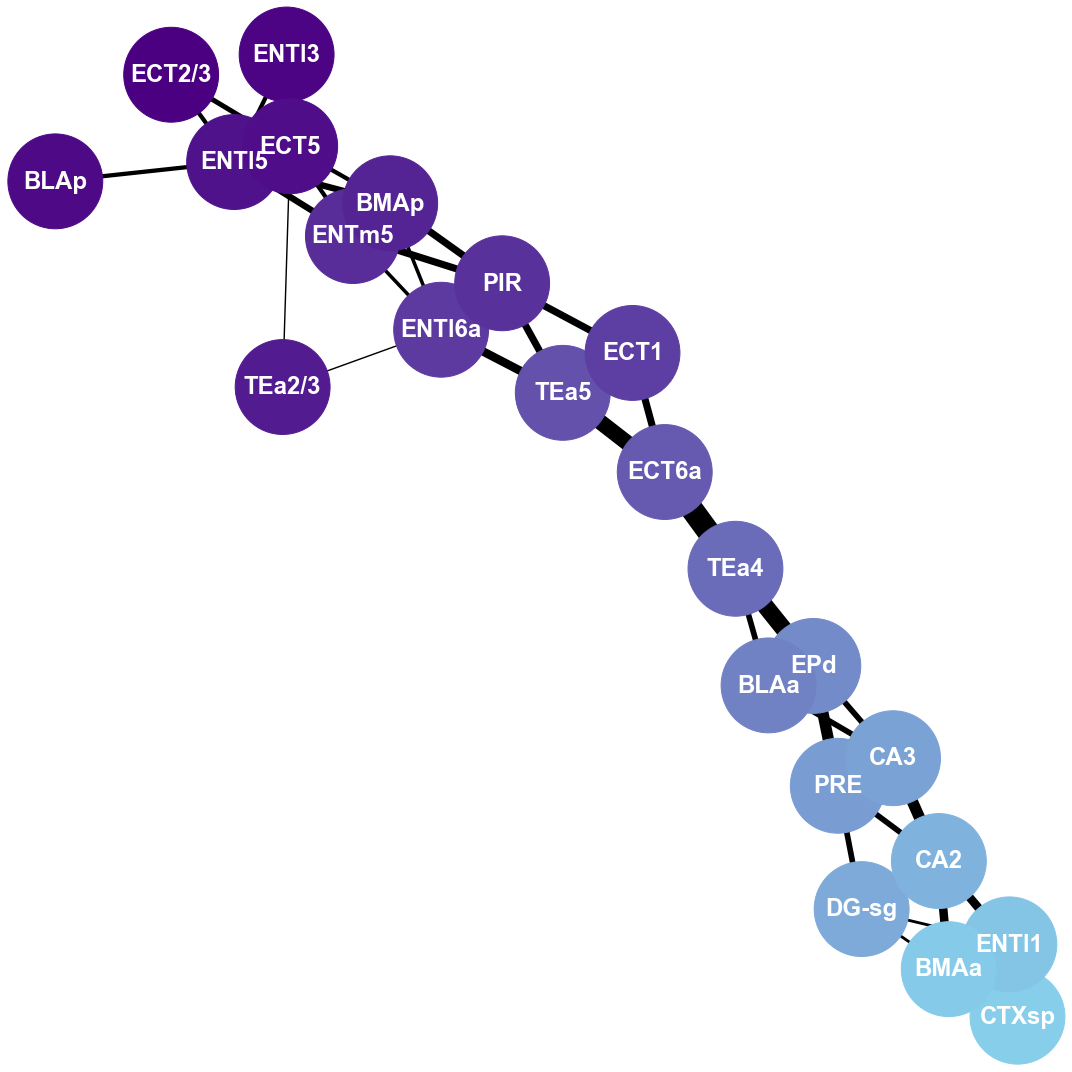

2


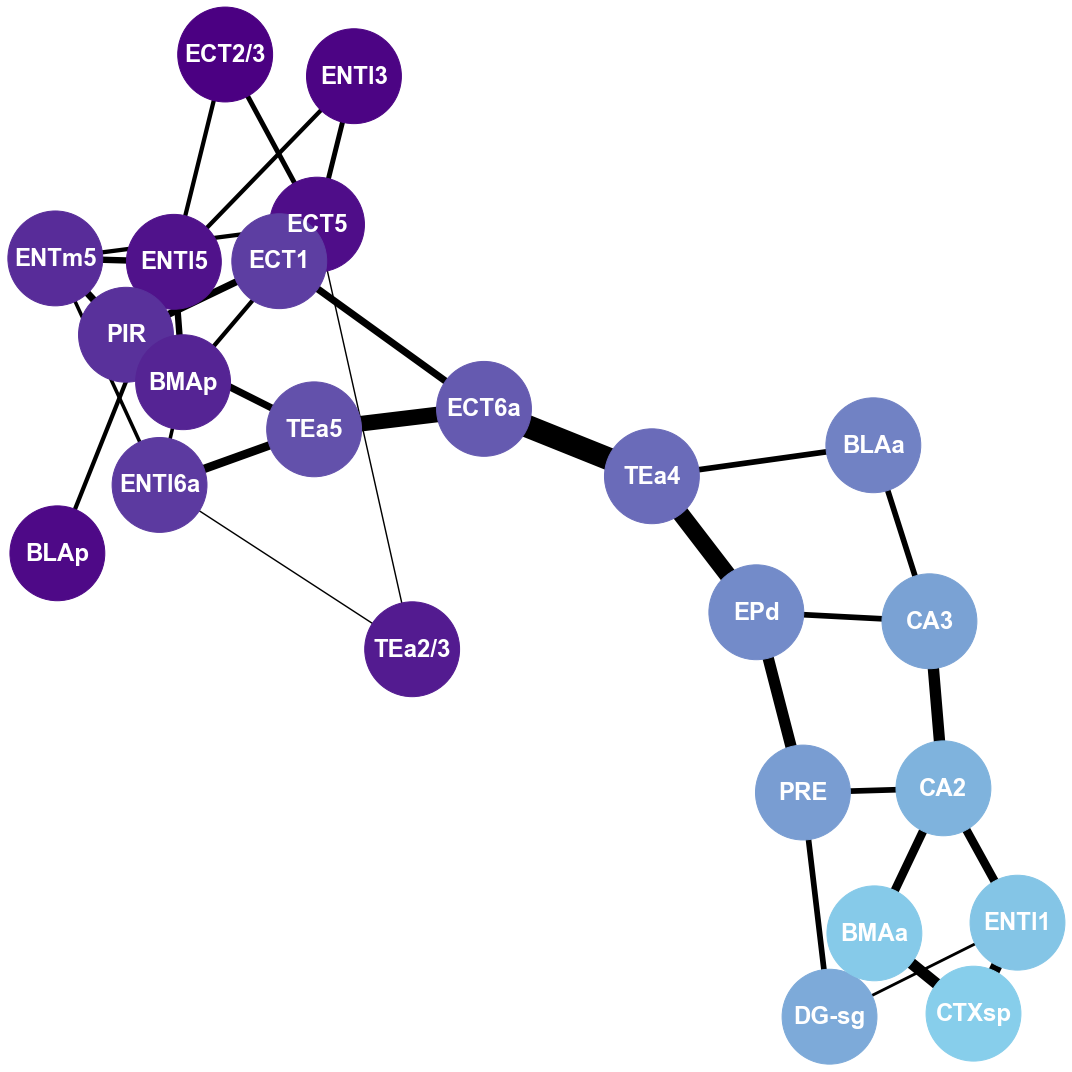

3


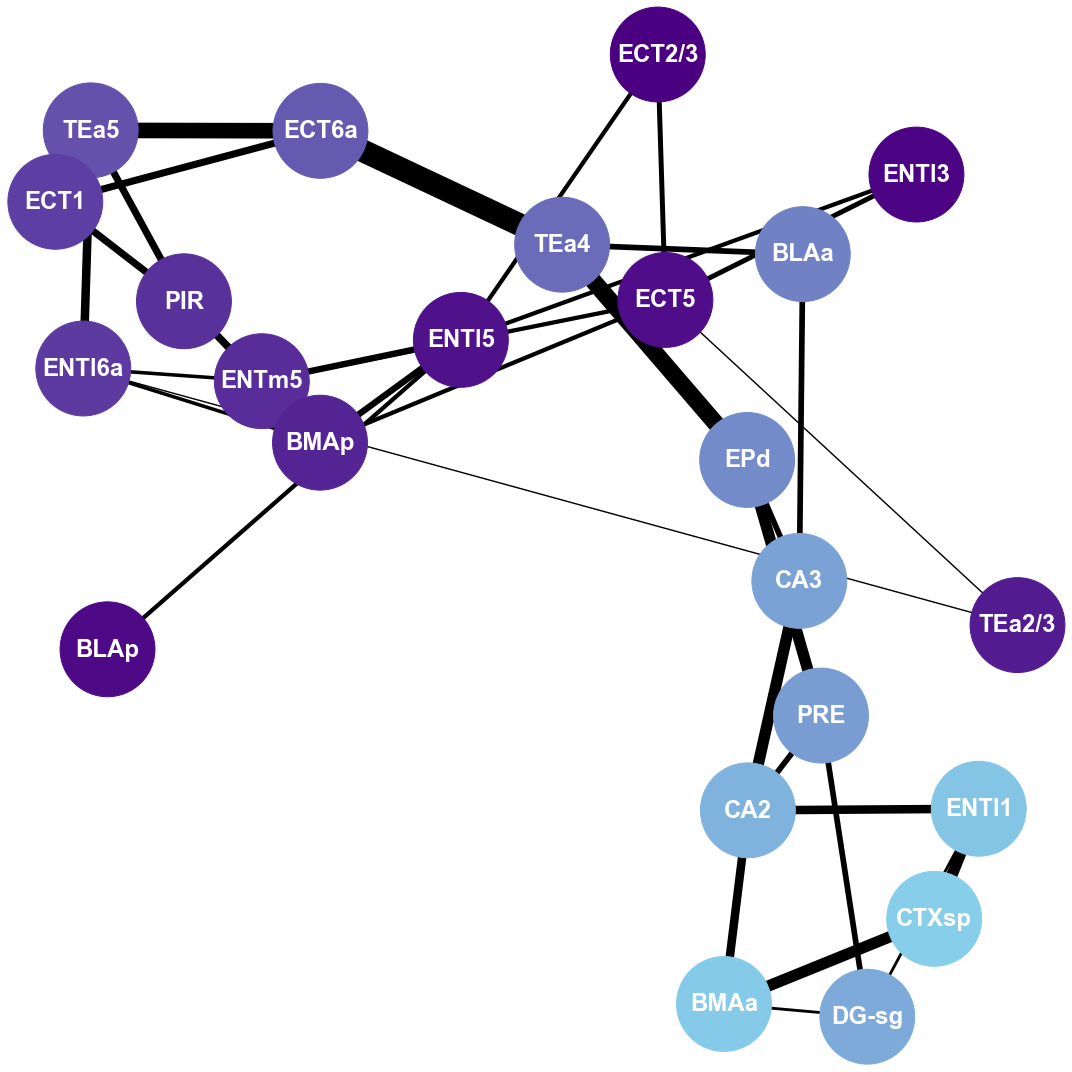

4


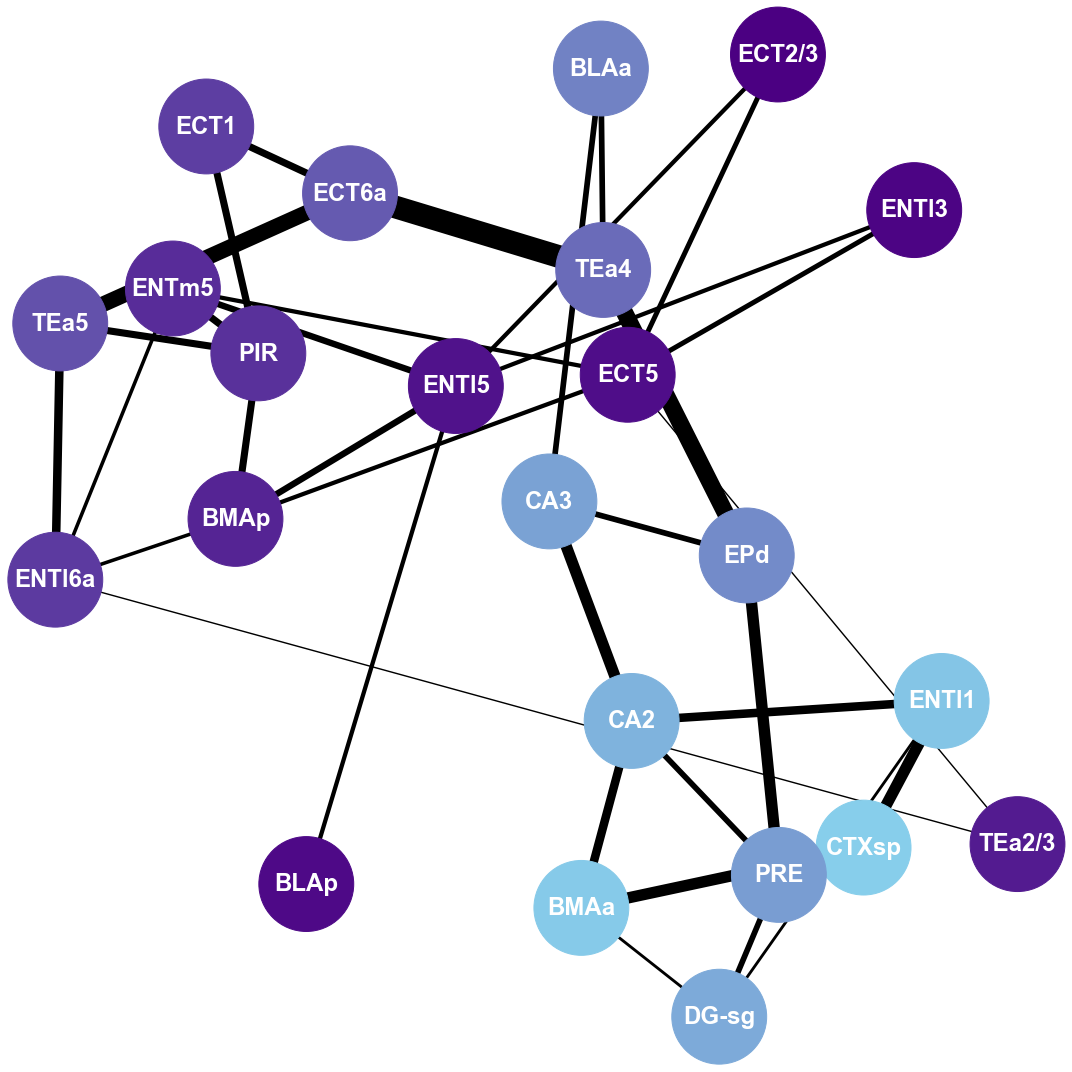

5


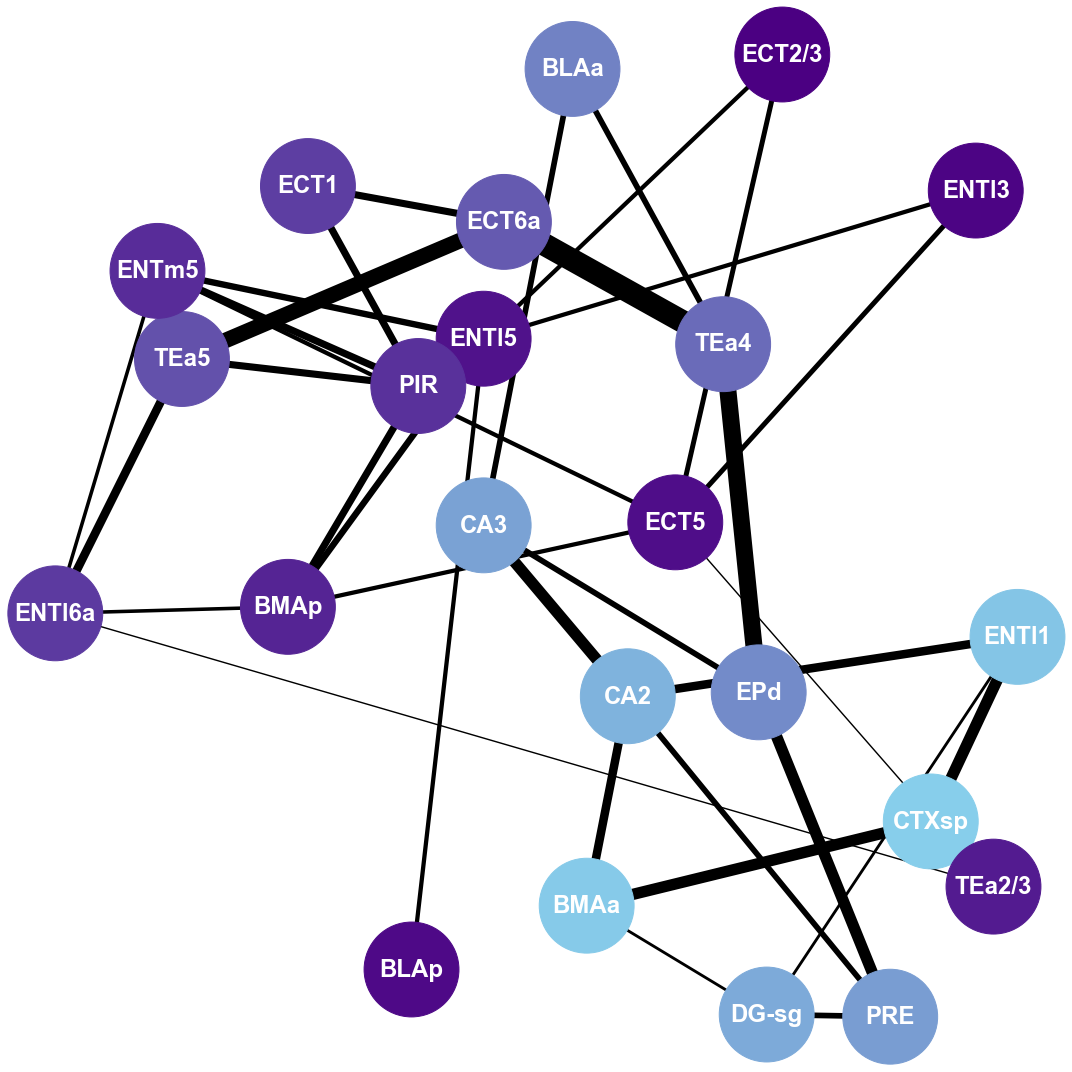

6


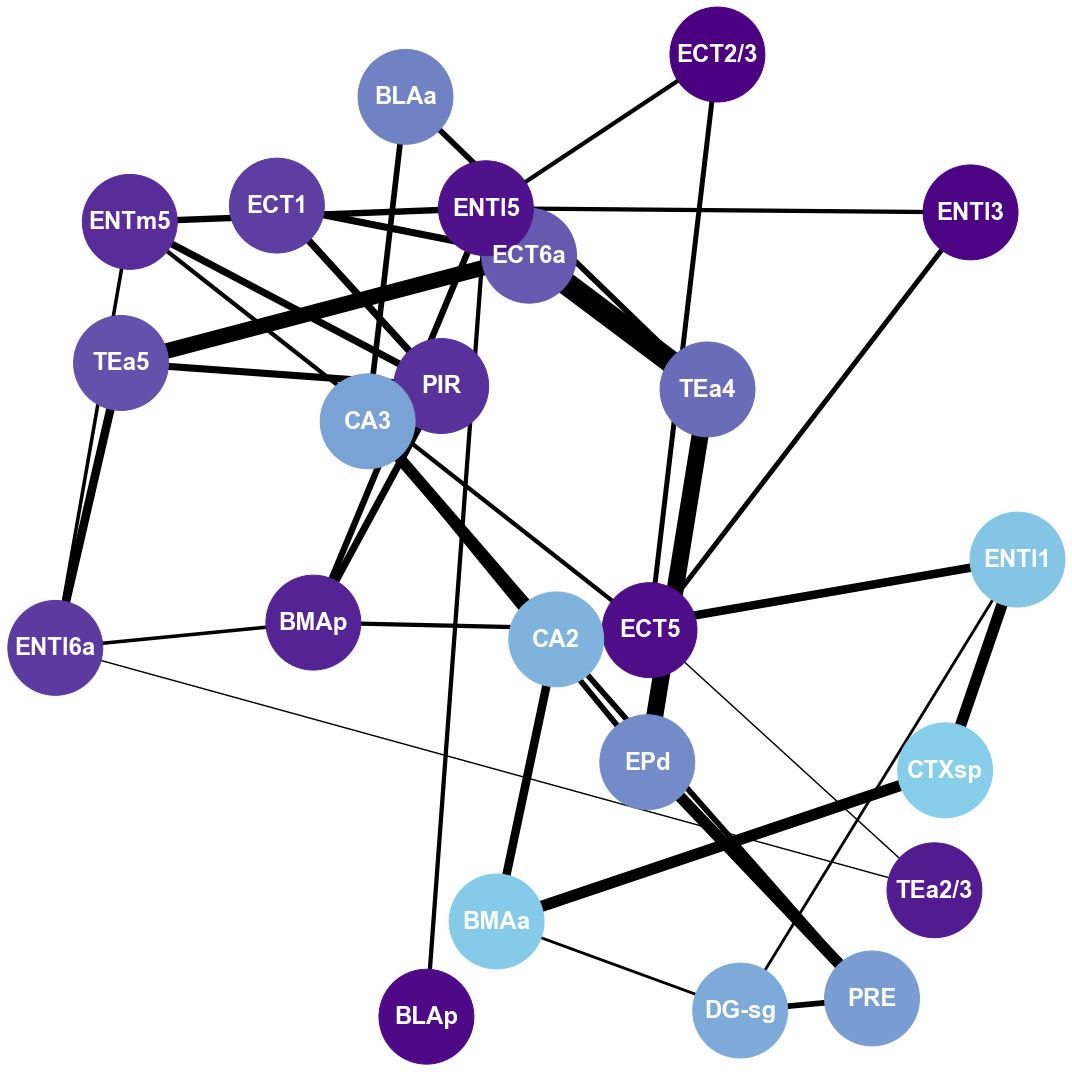

7


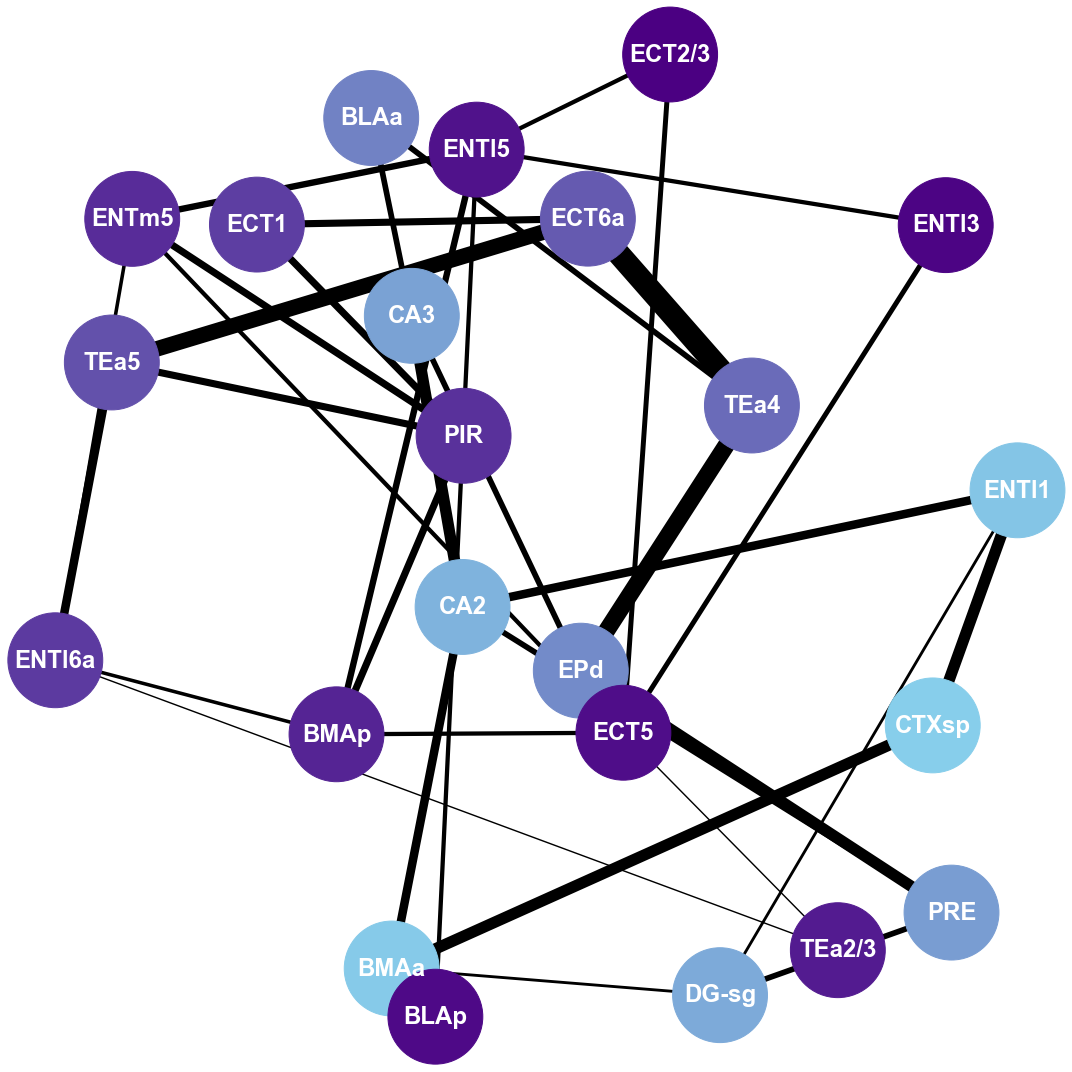

8


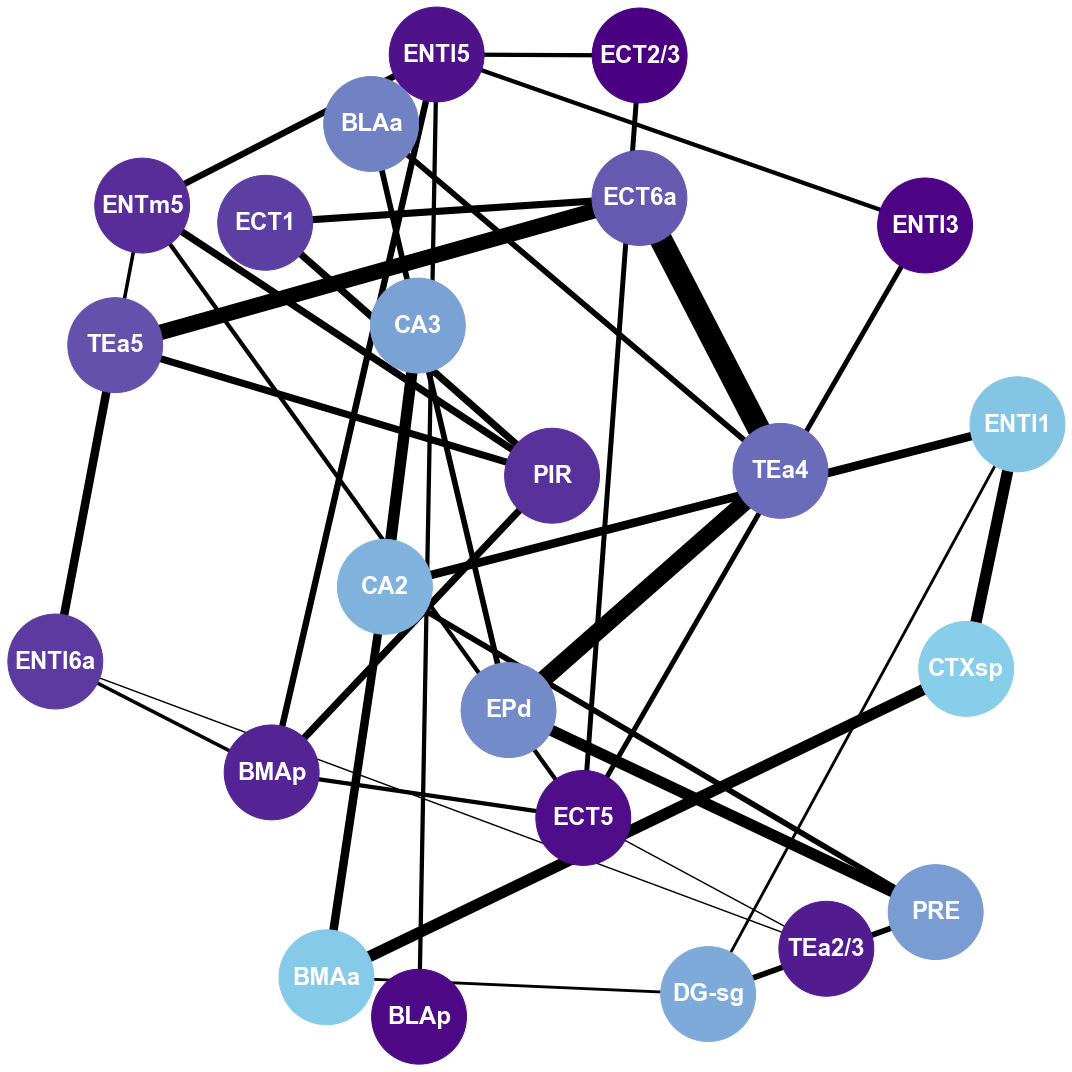

9


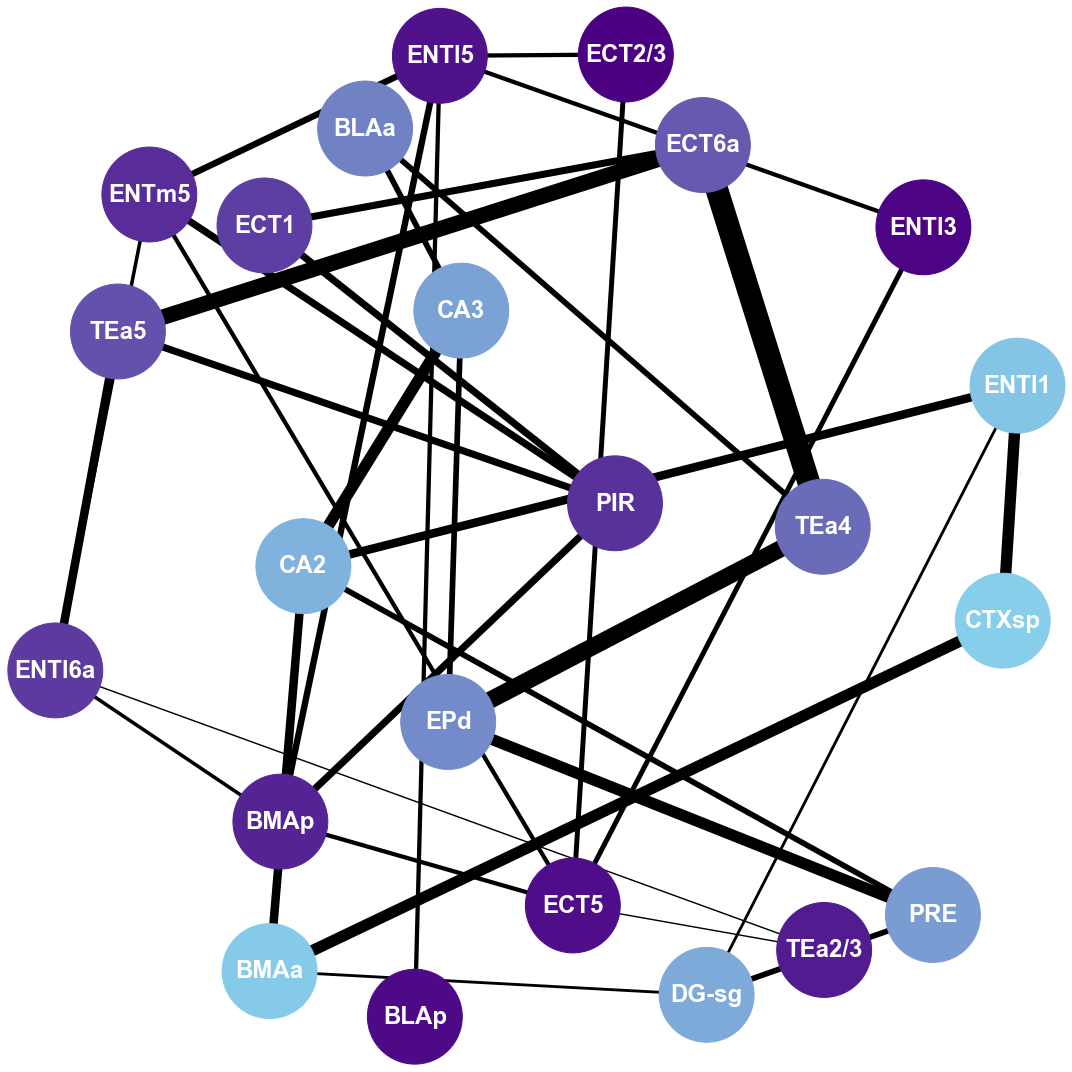

10


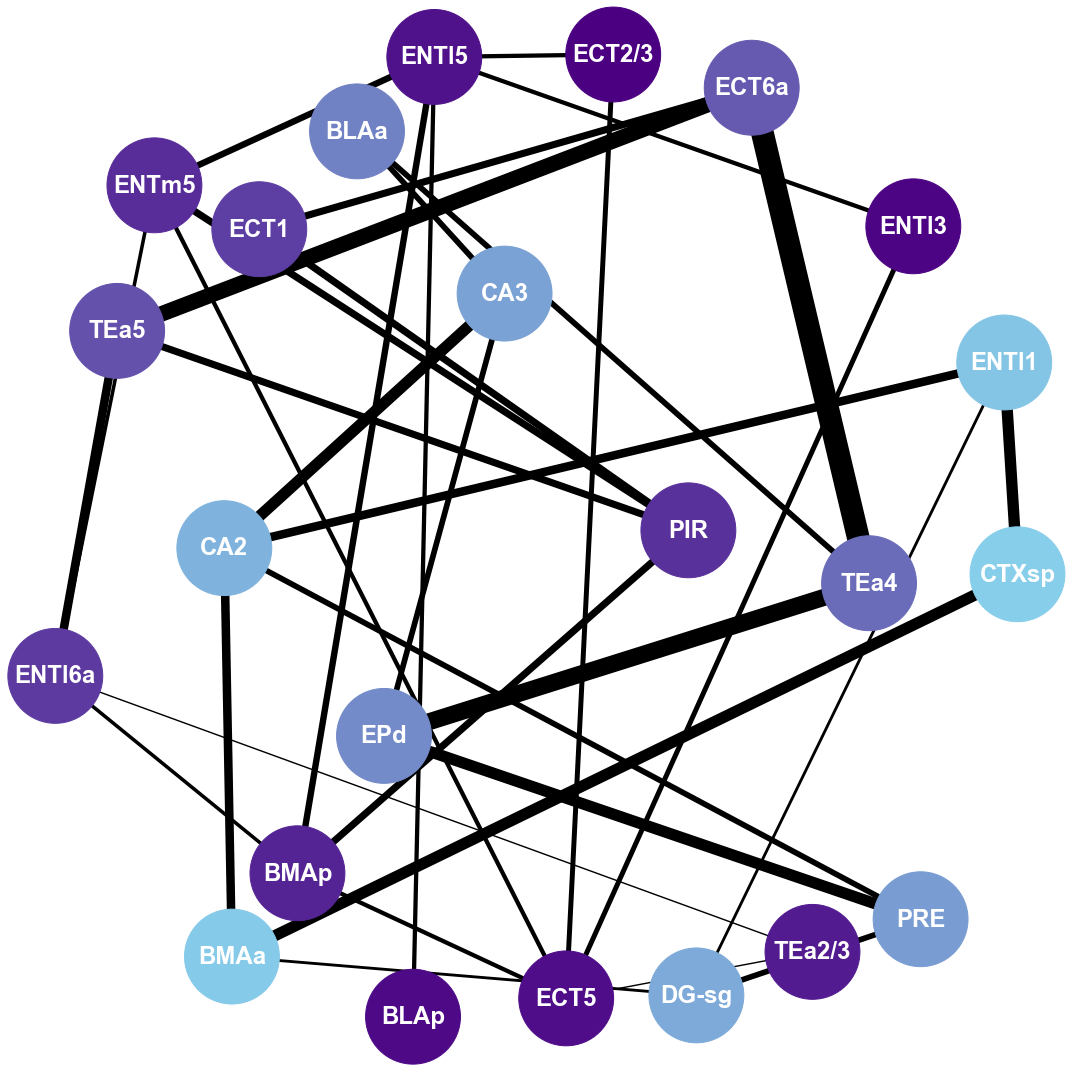

11


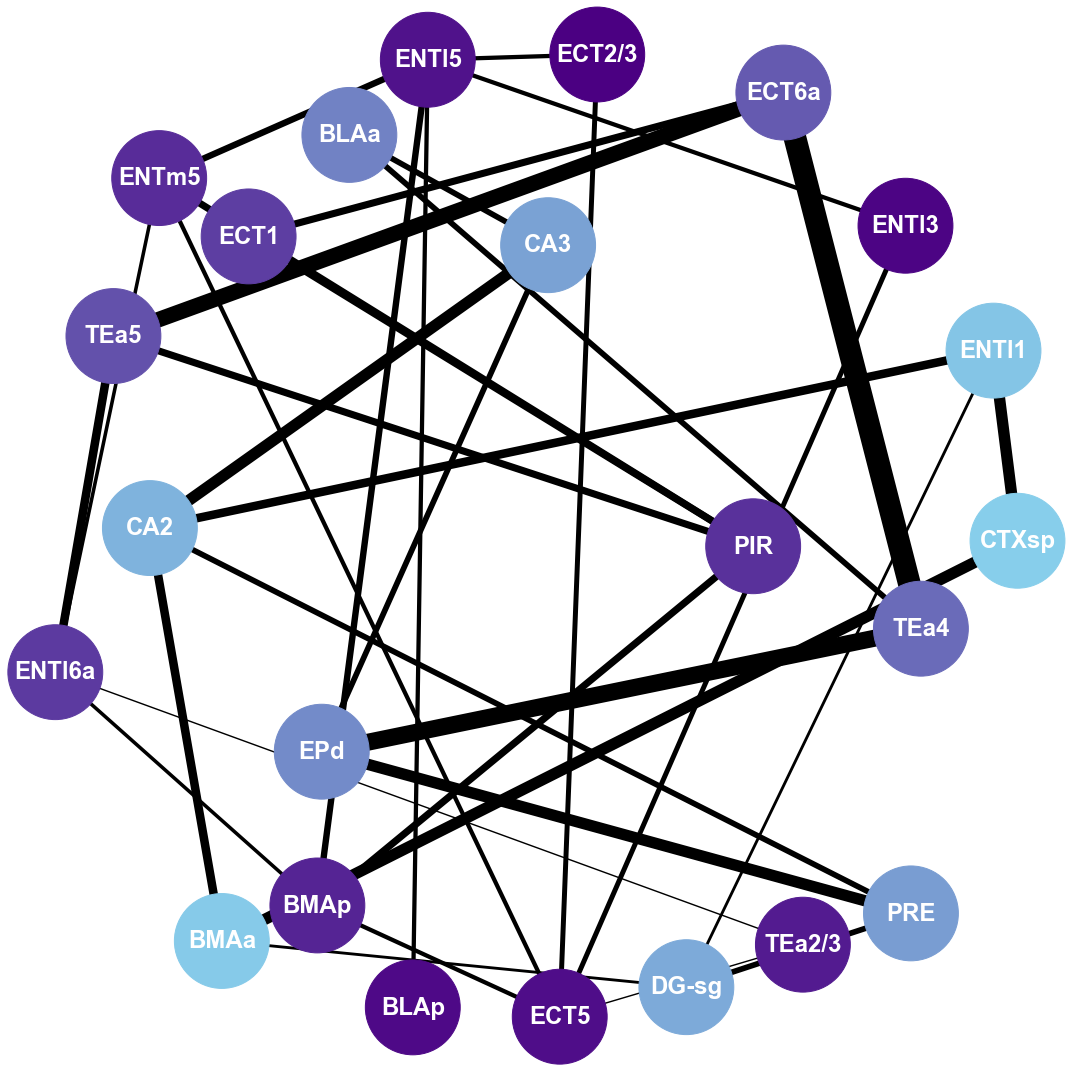

12


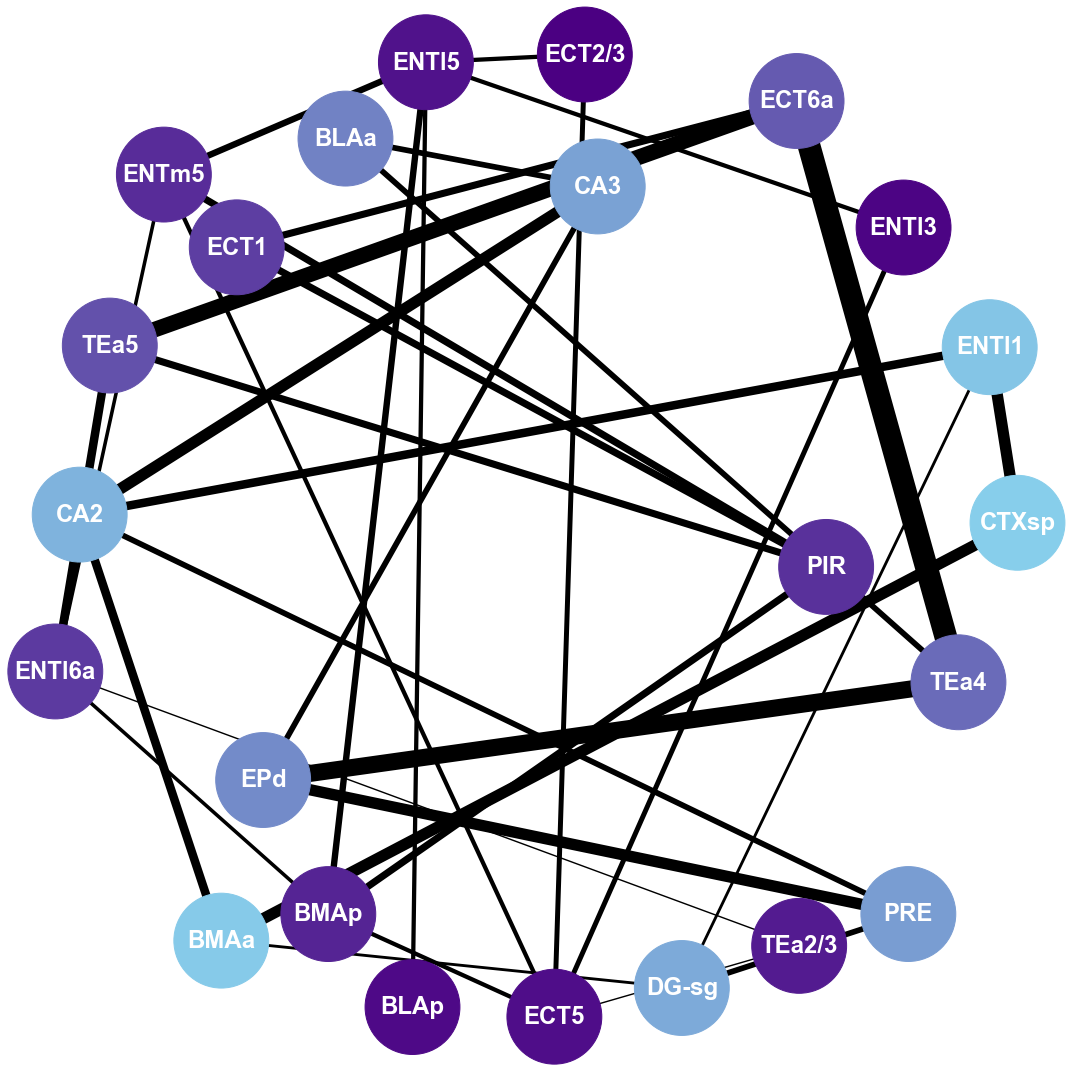

13


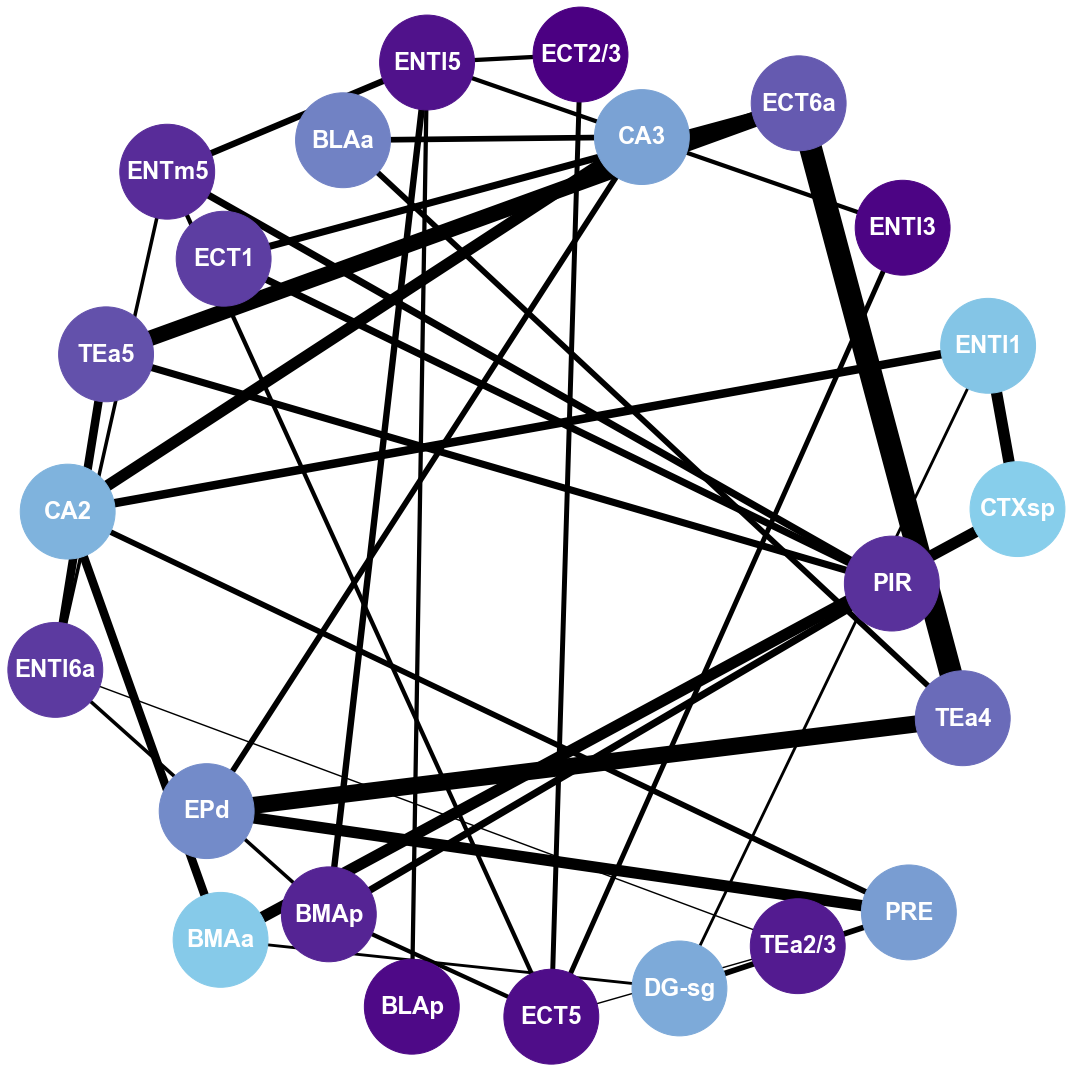

14


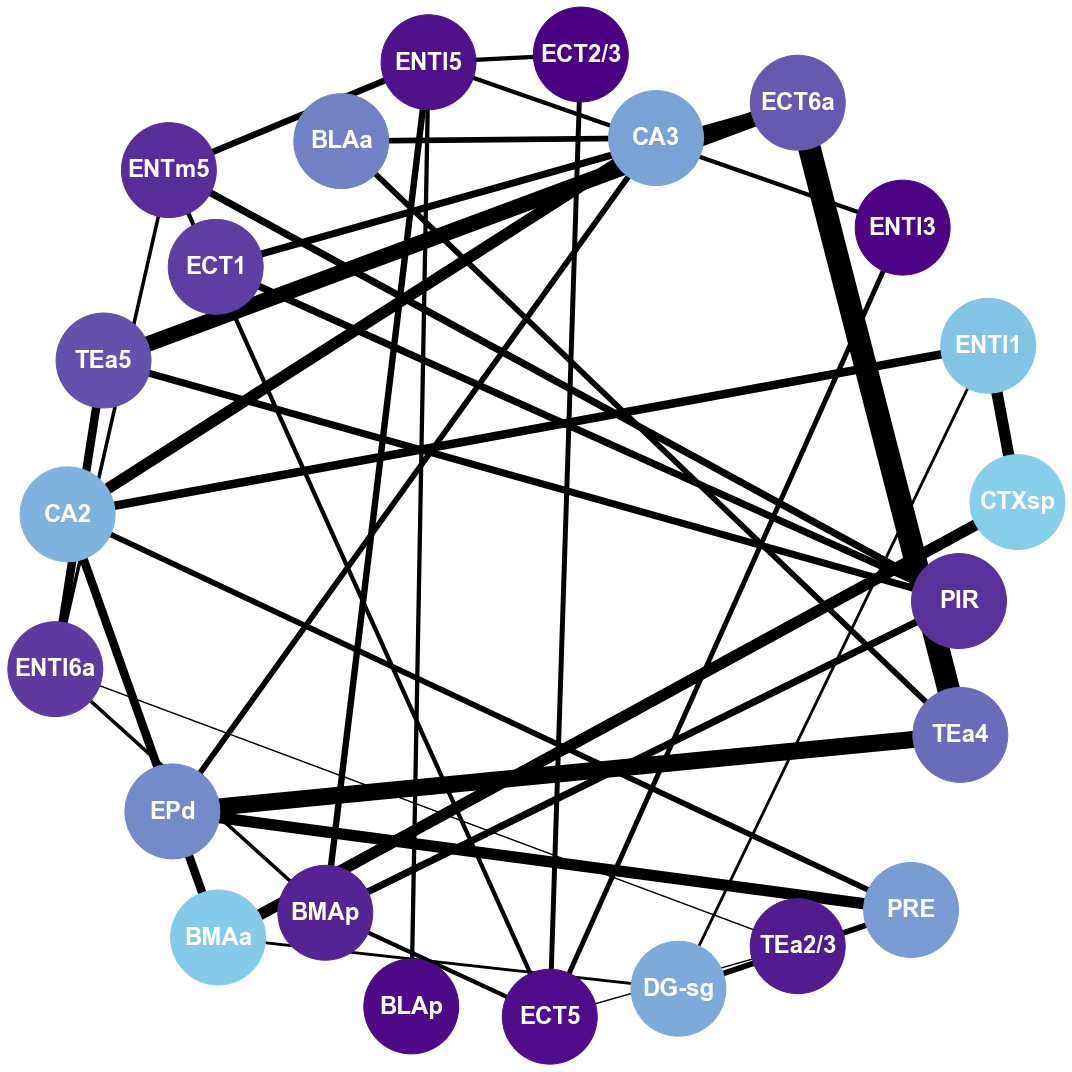

15


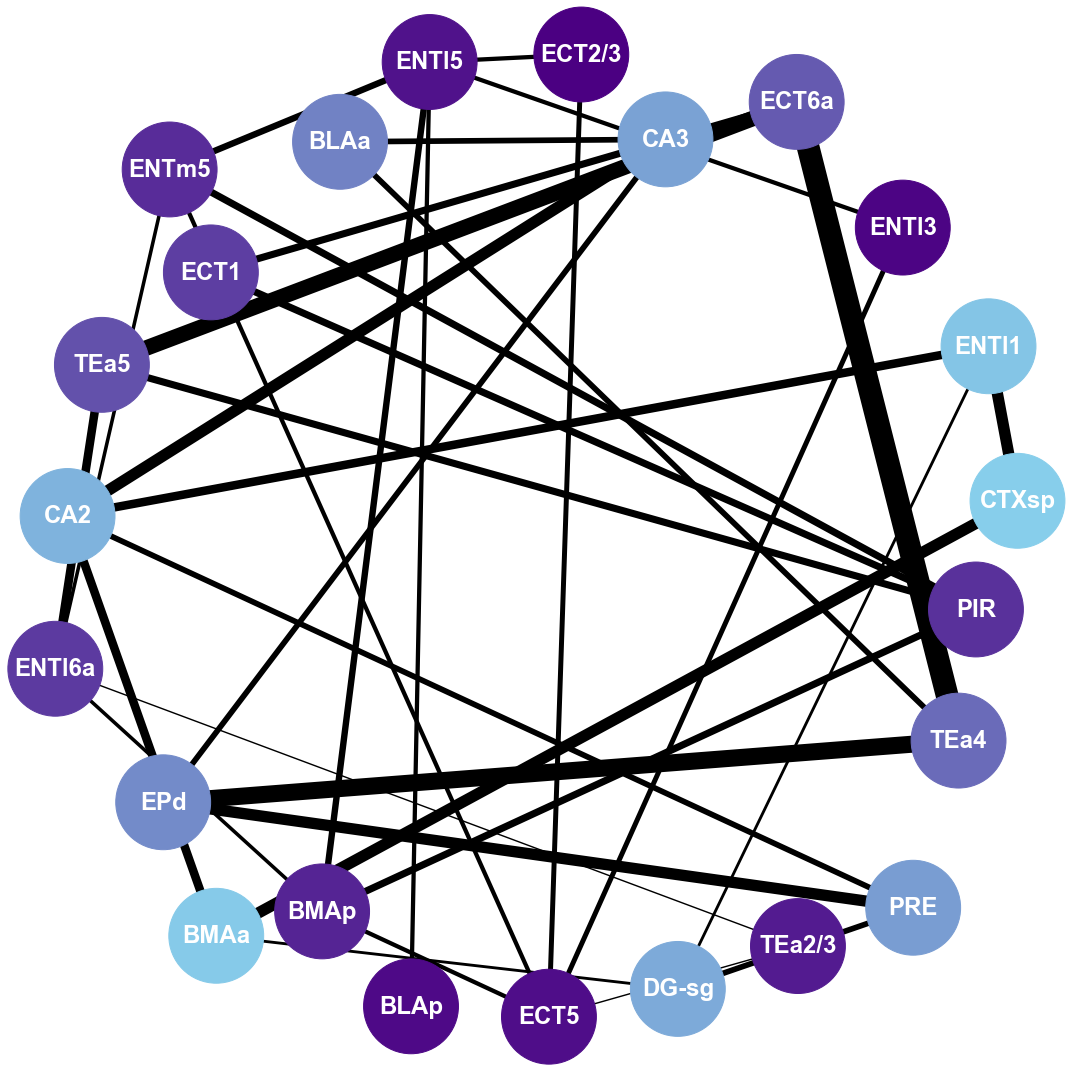

16


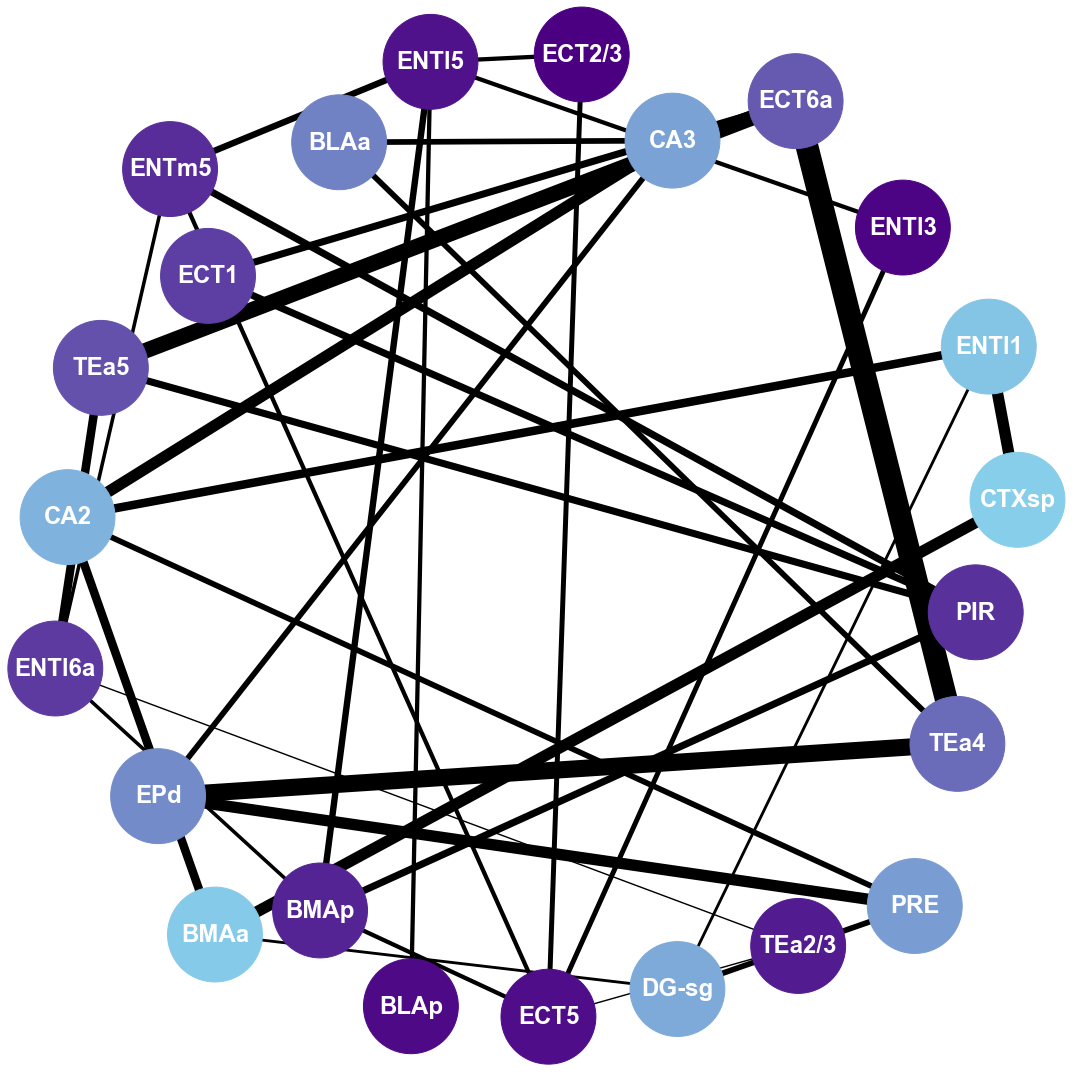

17


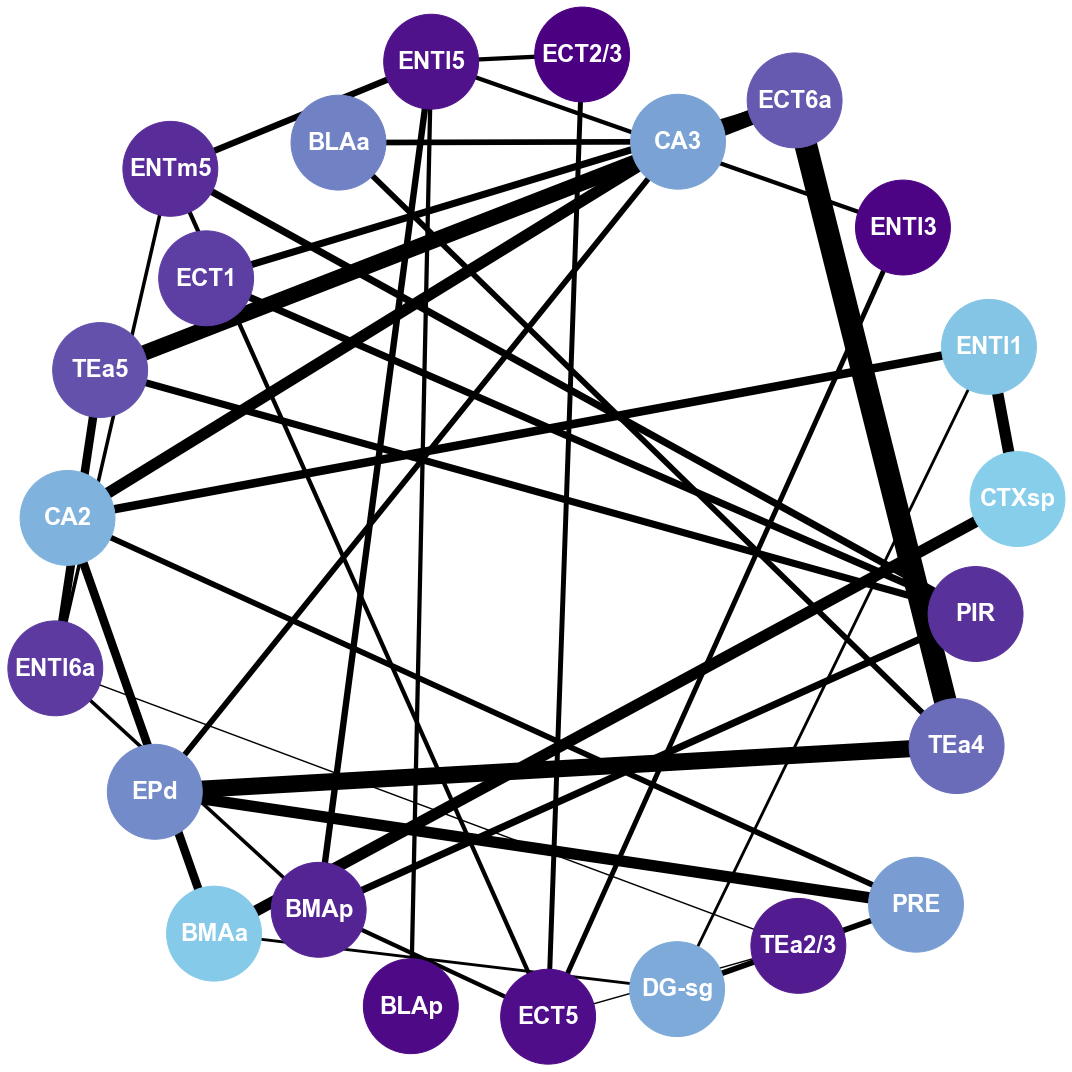

18


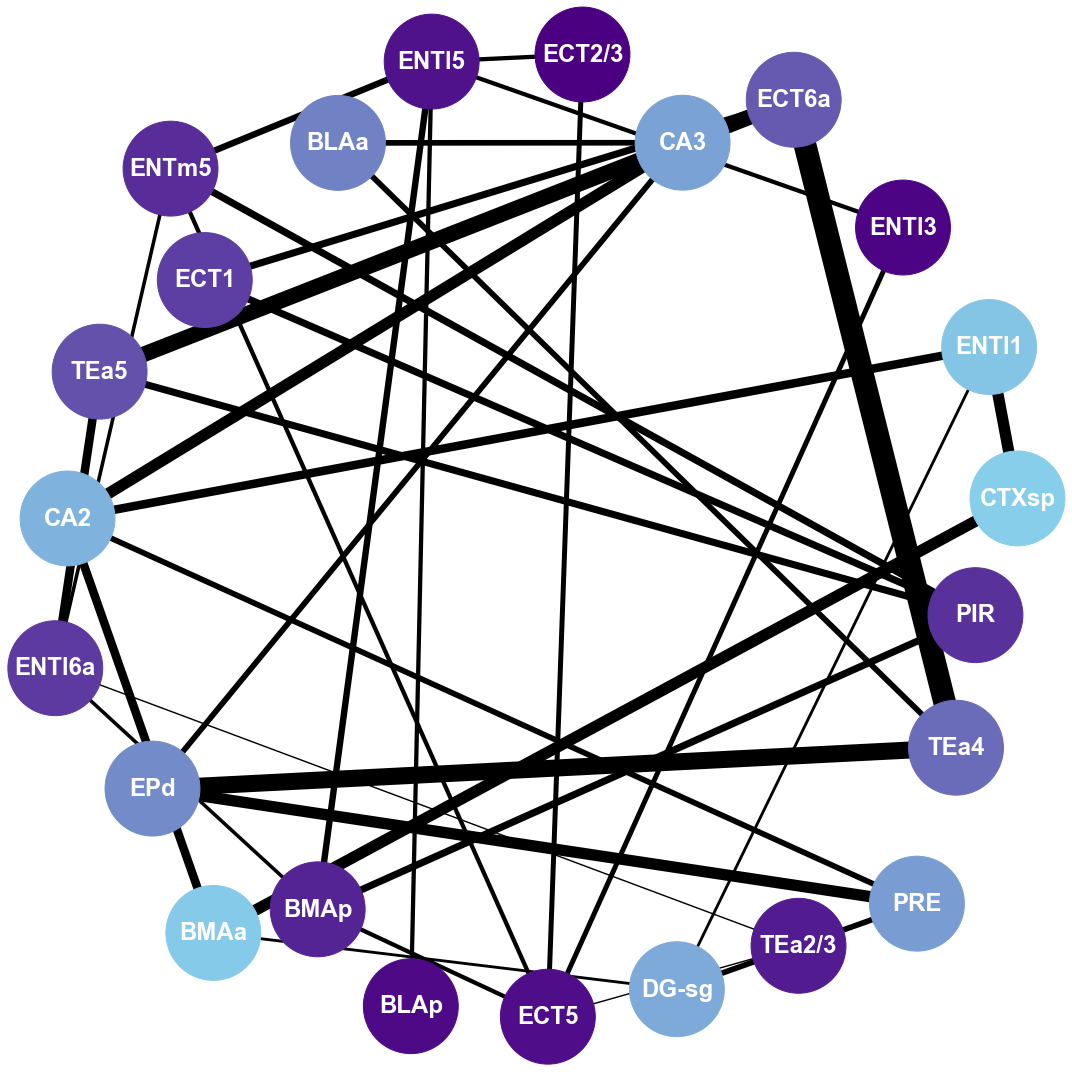

19


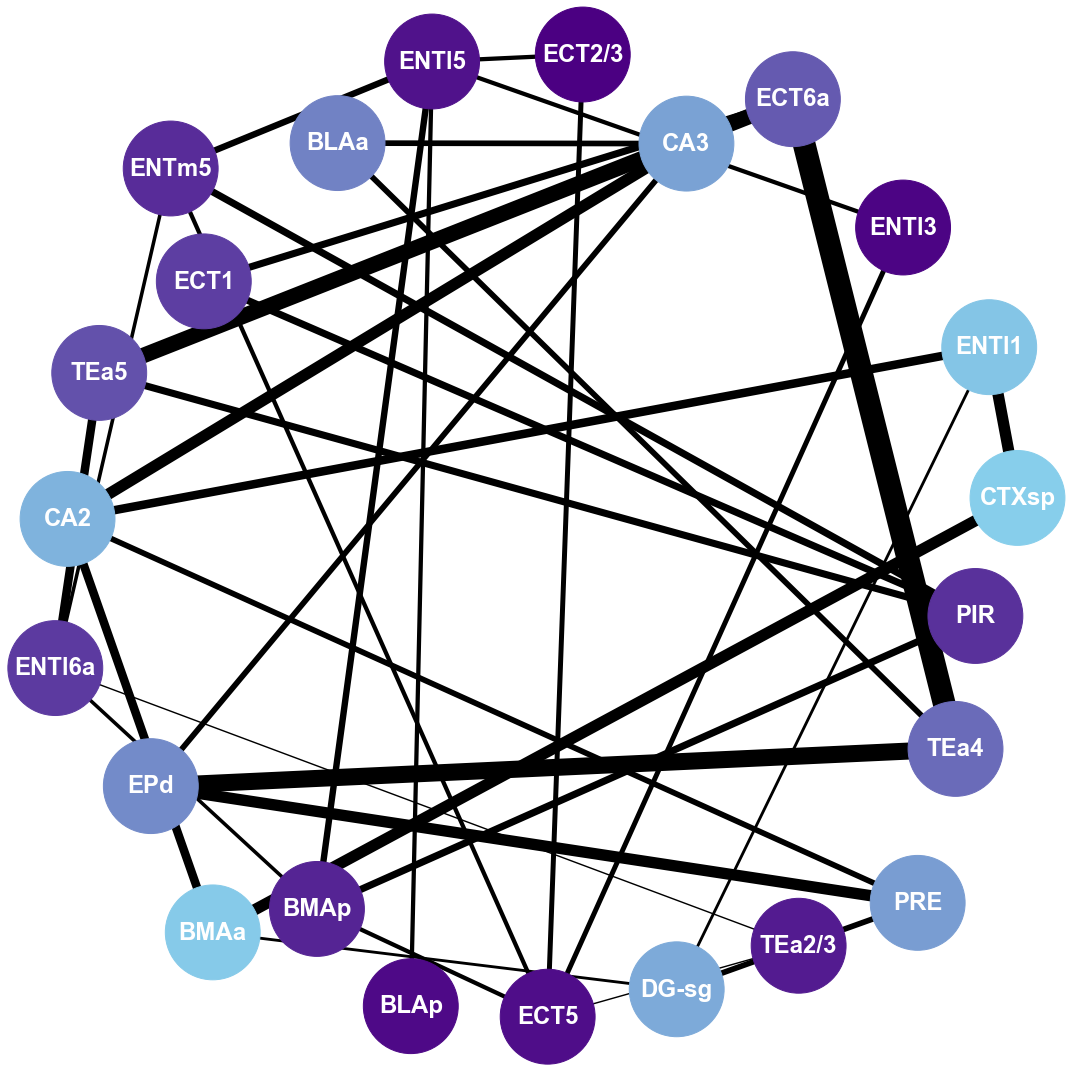

In [904]:
# Sup.6C
# Define function to draw a graph
def draw_graph(G, node_label_mapping, sorted_region_mapping, size, ii):
    # get rank values and normalize to [0,1]
    node_ranks = [sorted_region_mapping[node] for node in G.nodes()]
    node_ranks_normalized = (node_ranks - np.min(node_ranks)) / (np.max(node_ranks) - np.min(node_ranks))

    # create color map
    colors = ["skyblue", "indigo"]
    cmap = LinearSegmentedColormap.from_list("mycmap", colors, N=256)

    # map normalized rank values to colors
    node_colors = [cmap(rank) for rank in node_ranks_normalized]

    # Draw the graph
    plt.figure(figsize=(15, 15))  # Adjust the figure size
    
    pos = nx.spring_layout(G, seed=4,  k=i)  # positions for all nodes



    # nodes, with colors specified and increased size
    nx.draw_networkx_nodes(G, pos, node_size=9000, node_color=node_colors)

    # normalize edge weights by total weight
    edges = G.edges(data=True)
    total_weight = sum(d['weight'] for u, v, d in edges)
    
    scaling_factor = 250
    
    weights = [(d['weight']/total_weight) * scaling_factor for u, v, d in edges]

    # edges with reduced width
    nx.draw_networkx_edges(G, pos, width=weights, edge_cmap=plt.cm.Blues)

    # labels with white font color
    nx.draw_networkx_labels(G, pos, font_size=24, verticalalignment='center', font_color='white', font_weight='bold')

    # remove the box around the figure
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    
    plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)  # Adjust the plot margins

    plt.show()
    
for i in np.arange(1, 20, 1):
    print(i)
    draw_graph(G, node_label_mapping, sorted_region_mapping, size, i)

In [809]:
# Read annotation.nii (CUBIC-atlas 1.1 (Mano et al 2021) voxel-level regional anntation information)
# The `annotation.nii.gz` file is hosted on GitHub, as the TIFF file was too large. Please convert the `.nii.gz` file to TIFF format on your own.
# This is needed to write Fig.2E.
Dir_annot = "/export3/Imaging/cubic-atlas_v1-1/cubic-atlas/annotation.nii.tif"
image_annotation = tifffile.imread(Dir_annot) 

In [811]:
z_min = 9000
z_max = 12000
y_min = 18000
y_max = 25000
x_min = 14000
x_max = 25000

flipped_image = np.flip(image_annotation[int(z_min/40):int(z_max/40), int(y_min/40):int(y_max/40), int(x_min/40):int(x_max/40)], axis=2)

tifffile.imsave(
    dir2 +"annotation_ROI.tif",
    flipped_image.astype(np.uint16)
)

In [823]:
# Create a dictionary mapping region ids to ranks
region_id_to_rank = dict(zip(unique_ids_in_slice.astype(int), 47 - tau_region_mean_rank))

# Create a copy of the flipped_image
flipped_image_ranked = np.copy(flipped_image)

# Substitute each pixel's region id with its corresponding rank if it exists in the dictionary, else set it to 0
for i, j, k in np.ndindex(flipped_image_ranked.shape):
    flipped_image_ranked[i, j, k] = region_id_to_rank.get(flipped_image_ranked[i, j, k], 0)

# Save the ranked image
tifffile.imsave(
    dir2 + "annotation_ROI_ranked.tif",
    flipped_image_ranked.astype(np.uint16)
)


In [871]:
import itertools

regionname_list2 = []
for i in unique_ids_in_slice.astype(int):
    #print(i)
    regionname_list2.append(data_id["acronym"][data_id["id"]==i].values) 
regionname_list2 = np.array(regionname_list2)

# Apply the sorting to all regions and store in a new variable
sorted_region_names = [regionname_list2[region][np.argsort(tau_region1_rank[region])] for region in ordered_regions_storage[12]]

# Convert each region group list into a single list
sorted_region_names_combined = [list(itertools.chain(*region)) for region in sorted_region_names]

# Print combined region names
for region in sorted_region_names_combined:
    print(region)

['CTXsp', 'ENTl1', 'DG-sg', 'PRE', 'EPd', 'TEa4', 'ECT6a', 'TEa5', 'ENTl6a', 'ENTm5', 'ENTl5', 'ENTl3']
['CTXsp', 'BMAa', 'DG-sg', 'PRE', 'EPd', 'TEa4', 'ECT6a', 'TEa5', 'ENTl6a', 'ENTm5', 'ENTl5', 'ENTl3']
['CTXsp', 'ENTl1', 'DG-sg', 'PRE', 'EPd', 'TEa4', 'ECT6a', 'TEa5', 'ENTl6a', 'ENTm5', 'ECT5', 'ENTl3']
['CTXsp', 'BMAa', 'DG-sg', 'PRE', 'EPd', 'TEa4', 'ECT6a', 'TEa5', 'ENTl6a', 'ENTm5', 'ECT5', 'ENTl3']
['CTXsp', 'ENTl1', 'DG-sg', 'PRE', 'EPd', 'TEa4', 'ECT6a', 'TEa5', 'PIR', 'ENTm5', 'ENTl5', 'ENTl3']
['CTXsp', 'BMAa', 'DG-sg', 'PRE', 'EPd', 'TEa4', 'ECT6a', 'TEa5', 'PIR', 'ENTm5', 'ENTl5', 'ENTl3']
['CTXsp', 'ENTl1', 'DG-sg', 'PRE', 'EPd', 'TEa4', 'ECT6a', 'TEa5', 'PIR', 'ENTm5', 'ECT5', 'ENTl3']
['CTXsp', 'BMAa', 'DG-sg', 'PRE', 'EPd', 'TEa4', 'ECT6a', 'TEa5', 'PIR', 'ENTm5', 'ECT5', 'ENTl3']
['CTXsp', 'ENTl1', 'DG-sg', 'PRE', 'EPd', 'TEa4', 'ECT6a', 'TEa5', 'ENTl6a', 'ENTm5', 'ENTl5', 'ECT2/3']
['CTXsp', 'ENTl1', 'DG-sg', 'PRE', 'EPd', 'TEa4', 'ECT6a', 'TEa5', 'ENTl6a', 'ENTm5

In [877]:
# The list exclusive_12 contains region names that we want to map to ranks
exclusive_12 = ['ENTm5',
 'TEa2/3',
 'TEa5',
 'DG-sg',
 'CA2',
 'PRE',
 'ENTl3',
 'TEa4',
 'ENTl6a',
 'ENTl5',
 'CA3',
 'ENTl1',
 'ECT1',
 'ECT2/3',
 'ECT5',
 'ECT6a',
 'EPd',
 'BLAa',
 'BLAp',
 'CTXsp',
 'PIR',
 'BMAp',
 'BMAa']

# regionname_list2 is a list of region names corresponding to the region ids in unique_ids_in_slice
regionname_list2 = [data_id["acronym"][data_id["id"]==id_].values[0] for id_ in unique_ids_in_slice.astype(int)]

# Create a dictionary mapping region names to ids
region_name_to_id = {name: id_ for name, id_ in zip(data_id["acronym"], data_id["id"])}

# Convert region names in exclusive_12 to corresponding ids
exclusive_12_ids = [region_name_to_id[region] for region in exclusive_12]

# Get the maximum rank
max_rank = np.max(tau_region_mean_rank)

# Create a dictionary to map exclusive region ids to their reversed ranks
exclusive_region_id_to_rank = {id_: max_rank + 1 - rank for id_, rank in zip(unique_ids_in_slice, tau_region_mean_rank) if id_ in exclusive_12_ids}

# Apply the ranking to the region ids and store them in a new variable
ranked_exclusive_12 = [exclusive_region_id_to_rank.get(id_) for id_ in exclusive_12_ids]

# Sort the regions in exclusive_12 based on their ranks (in descending order this time)
sorted_region_names = [x for _, x in sorted(zip(ranked_exclusive_12, exclusive_12), reverse=True)]

# Print the sorted region names
for region in sorted_region_names:
    print(region)


CTXsp
BMAa
ENTl1
CA2
DG-sg
CA3
PRE
EPd
BLAa
TEa4
ECT6a
TEa5
ECT1
ENTl6a
PIR
ENTm5
BMAp
TEa2/3
ENTl5
ECT5
BLAp
ENTl3
ECT2/3


In [1405]:
# Sort regions by tau values in descending order　
sorted_indices = np.argsort(tau_region_mean_rank.flatten())[::-1]  # reverse the array for descending order
sorted_region_names = np.squeeze(regionname_list2)[sorted_indices]  # apply np.squeeze() to convert elements to strings
sorted_tau_region = np.squeeze(tau_region_mean_rank)[sorted_indices]  # apply np.squeeze() to convert to 1D array

In [1406]:
selected_r = [['CTXsp', 'BMAa', 'DG-sg', 'PRE', 'EPd', 'TEa4', 'ECT6a', 'TEa5', 'ENTl6a', 'ENTm5', 'ENTl5', 'ENTl3'],]



# Create a dictionary mapping region names to ids
region_name_to_id = {name: id_ for name, id_ in zip(data_id["acronym"], data_id["id"])}

ex_region_ids = [region_name_to_id.get(region) for region in selected_r[0]]

ex_region_id_to_rank = [sorted_tau_region[sorted_region_names == region][0] for region in selected_r[0]]

In [1407]:
ex_region_id_to_rank

[0, 1, 8, 11, 15, 22, 26, 28, 33, 36, 42, 45]

47
46
39
36
32
25
21
19
14
11
5
2


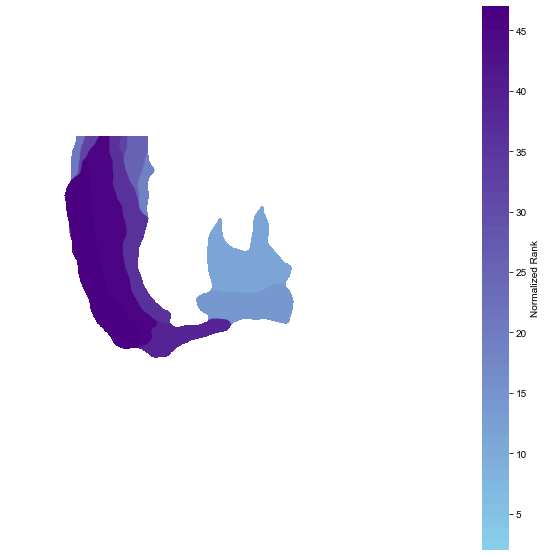

In [1409]:
# Fig.2E

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import tifffile

image_13_rank = tifffile.imread(dir2 + "For_Fig1F_median_30ed_13rank_image_scale10.tif")

# Create a mask where the image is 0
mask = image_13_rank == 0

for i in range(1, 13):
    print(len(tau_region1_rank) -  ex_region_id_to_rank[i-1])
    image_13_rank[image_13_rank == 13 - i] = len(tau_region1_rank) -  ex_region_id_to_rank[i-1]

# Apply the mask to the normalized image
flipped_image_ranked_max_projected_masked = np.ma.array(image_13_rank, mask=mask)

# Create a colormap from viridis
colors = ["skyblue", "indigo"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors, N=len(tau_region_mean_rank))

# Set the color of the masked pixels to be transparent
cmap.set_bad(color='none')

# Plot the max projected image
plt.figure(figsize=(10, 10))
im = plt.imshow(flipped_image_ranked_max_projected_masked, cmap=cmap)
plt.axis('off')  # Turn off the axis

colorbar = plt.colorbar(im, label='Normalized Rank')
colorbar.outline.set_visible(False)  # Turn off the colorbar outline

# Save if needed
plt.savefig(dir2 + "Fig1F.png", transparent=True, dpi=300)

plt.show()

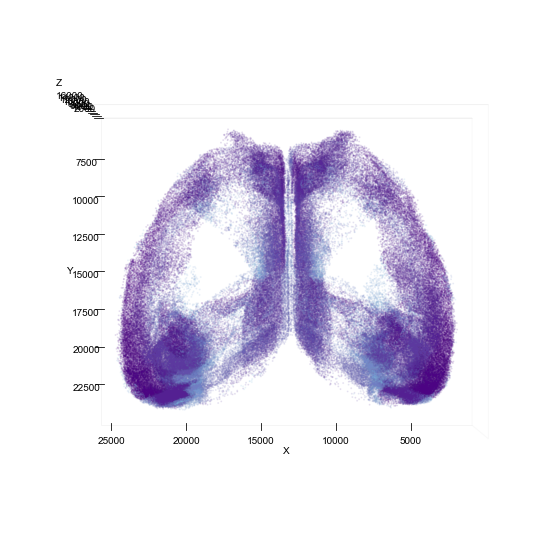

In [1068]:
# Visualize single depositions at whole-brain scale.
# Fig.2C related.

import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches


from matplotlib.colors import LinearSegmentedColormap

top_large_regions_indices = np.where(y > np.mean(y))[0]

# Get the ids of all small regions in the top 5 large regions
small_region_ids = []
for index in top_large_regions_indices:
    small_region_ids.extend(oya_id[index])
small_region_ids = np.array(small_region_ids)
    
# regionごとにタウを集計
tau_max_intensity_list2 = []
regionname_list2 = []
volume_list2 = []

selected_region_num = len(small_region_ids)

for i in small_region_ids:
    #print(i)
    regionname_list2.append(data_id["acronym"][data_id["id"]==i].values) 
regionname_list2 = np.array(regionname_list2)

for i in small_region_ids:
    volume_list2.append(data_id["volume(mm3)"][data_id["id"]==i].values)
volume_list2 = np.array(volume_list2)

cou = 0
for i in small_region_ids:
    #print(i)
    tau_max_intensity_list2.append(np.sum(data_2["deltaI"][data_2["Allen_ID"] == i])/volume_list2[cou])
    cou += 1
tau_max_intensity_list2 = np.array(tau_max_intensity_list2)


selected_region_num = len(volume_list2)

sorted_tau_max_intensity_list2 = tau_max_intensity_list2[np.argsort(tau_max_intensity_list2.flatten())[-selected_region_num:]]
sorted_regionname_list = regionname_list2[np.argsort(tau_max_intensity_list2.flatten())[-selected_region_num:]]
sorted_region_id = np.array(small_region_ids[np.argsort(tau_max_intensity_list2.flatten())][-selected_region_num:])
    

df = pd.DataFrame(data_2[::1])

# Create a colormap from magenta to blue
colors = ["skyblue", "indigo"]
n_bins = [len(sorted_region_id)]  # Discretizes the interpolation into bins
cmap_name = 'my_list'
# Create the colormap
color_map = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins[0])

colors = {id: color_map(i) for i, id in enumerate(sorted_region_id)}

# Filter df to only include rows where 'Allen_ID' is in colors
df = df[df['Allen_ID'].isin(colors.keys())]

# Add a new column for colors, using the 'Allen_ID' column to map to the colors dictionary
df['color'] = df['Allen_ID'].map(colors)

# Function to set aspect ratio
def set_aspect_ratio(ax):
    extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
    sz = extents[:,1] - extents[:,0]
    centers = np.mean(sz)
    maxsize = max(abs(sz))
    ratio = [x/maxsize for x in sz]
    return centers, ratio


for ii in range (8000, 8001, 500):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Define the range of z values you are interested in
    z_min = 0
    z_max = 30000
    y_min = 0
    y_max = 30000
    x_min = 0
    x_max = 30000

    # Filter df to only include rows where 'Z' is within the specified range
    df_slice = df[(df['Z'] >= z_min) & (df['Z'] <= z_max) & (df['Y'] >= y_min) & (df['Y'] <= y_max)& (df['X'] >= x_min) & (df['X'] <= x_max)] 

    # Then use df_slice instead of df in your plotting code
    scatter = ax.scatter(df_slice['X'], df_slice['Y'], df_slice['Z'], c=df_slice['color'].tolist(), s=1, alpha=0.1)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Get the unique Allen_IDs in the slice
    unique_ids_in_slice = df_slice['Allen_ID'].unique()

    # Create a legend with the region names, each with its corresponding color
    patches = [mpatches.Patch(color=colors[id], label=name[0]) for id, name in zip(sorted_region_id, sorted_regionname_list) if id in unique_ids_in_slice][::-1]
    # Calculate the number of columns needed for the legend
    n_cols = int(np.ceil(len(patches) / 30))
    #ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=n_cols)

    # Define the range of z values you are interested in

    #ax.set_xlabel('')
    #ax.set_ylabel('')
    #ax.set_zlabel('')
    #ax.set_xticks([])
    #ax.set_yticks([])
    #ax.set_zticks([])
    ax.grid(False)

    # Set background color to transparent
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    
    #ax.xaxis.pane.set_edgecolor('w')
    #ax.yaxis.pane.set_edgecolor('w')
    #ax.zaxis.pane.set_edgecolor('w')
    

    # Remove axes lines
    ax.w_xaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
    ax.w_yaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
    ax.w_zaxis.line.set_color((0.0, 0.0, 0.0, 0.0))

    # Set the view from above
    ax.view_init(90, 90)
    #ax.view_init(180, 90)

    centers, ratio = set_aspect_ratio(ax)
    ax.set_box_aspect(ratio)
    

    
    #ax.set_axis_off()    
    plt.savefig(dir2 + "3D_whole.png", transparent=True, dpi=300)

    plt.show()
    
    